### IE582 - Fall 2021
#### HOMEWORK 2

##### TASK 1

##### A

In [1]:
getwd()

[1] "C:/Users/asus_pinar/Desktop/files"

In [2]:
require(usedist)
require(readxl)
require(ggplot2)
require(scatterplot3d)


Loading required package: usedist
Warning message:
"package 'usedist' was built under R version 3.6.3"Loading required package: readxl
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: scatterplot3d


The code below is to read and visualize data and it is from the homework description. The data set is also given with the homework description.

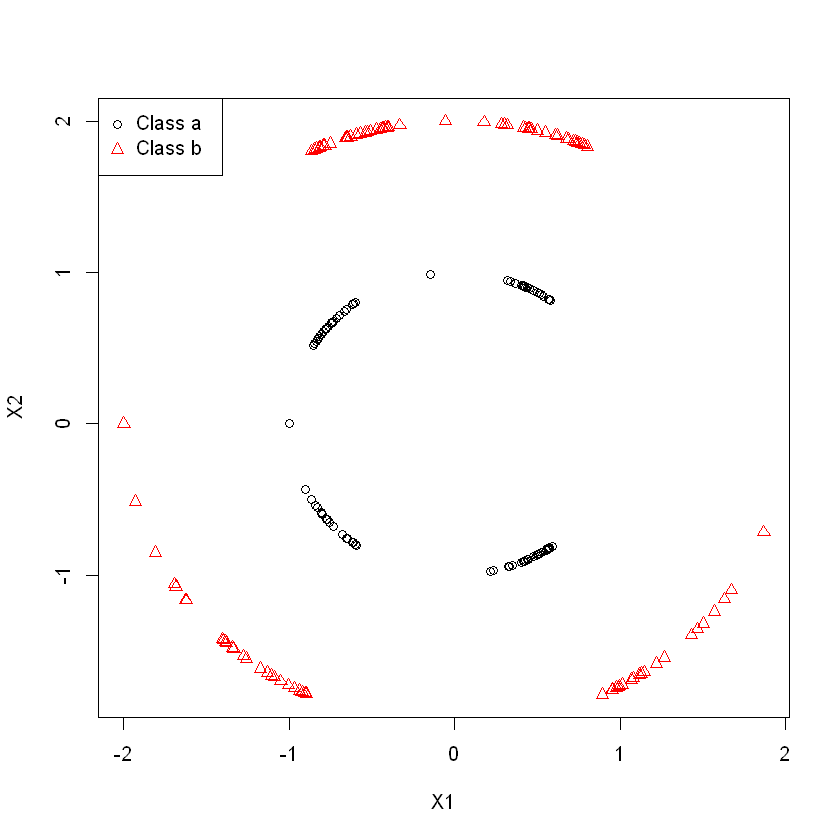

In [3]:

dat=read.csv('C:/Users/Pınar YILDIRIM/Desktop/ie582/IE582_Fall21_HW2_q1_data.csv',header=T)
lev=as.numeric(dat[,3])
plot(dat[,1],dat[,2],col=lev,pch=lev,xlab=names(dat)[1],ylab=names(dat)[2])
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))


In [4]:
str(dat)
summary(dat)
head(dat)
head(dat[-3])


'data.frame':	198 obs. of  3 variables:
 $ X1   : num  0.569 0.411 0.417 -0.792 -0.807 ...
 $ X2   : num  0.822 0.911 -0.909 0.611 -0.591 ...
 $ class: Factor w/ 2 levels "a","b": 1 1 1 1 1 1 1 1 1 1 ...


       X1                X2          class 
 Min.   :-2.0000   Min.   :-1.7908   a:99  
 1st Qu.:-0.7994   1st Qu.:-0.9445   b:99  
 Median :-0.2408   Median : 0.2578         
 Mean   :-0.1147   Mean   : 0.1006         
 3rd Qu.: 0.5128   3rd Qu.: 0.9786         
 Max.   : 1.8671   Max.   : 1.9992         

X1,X2,class
0.5694828,0.8220033,a
0.4114692,0.9114237,a
0.4173846,-0.9087299,a
-0.7918276,0.6107447,a
-0.8067767,-0.5908565,a
-0.7154271,0.6986874,a


X1,X2
0.5694828,0.8220033
0.4114692,0.9114237
0.4173846,-0.9087299
-0.7918276,0.6107447
-0.8067767,-0.5908565
-0.7154271,0.6986874


The data set consists of three columns. The first and second column are two features and the third columns is the class information. Both two features have similar scales with values between -2 and 2. 

There two classes a and b which are color coded in the above visualization.


In [5]:
pca_q1 = princomp(dat[-3], cor=T)
summary(pca_q1, loadings=T)
head(pca_q1$scores)

Importance of components:
                          Comp.1    Comp.2
Standard deviation     1.0004424 0.9995574
Proportion of Variance 0.5004425 0.4995575
Cumulative Proportion  0.5004425 1.0000000

Loadings:
   Comp.1 Comp.2
X1  0.707  0.707
X2  0.707 -0.707

Comp.1,Comp.2
0.96253438,0.1981970
0.87586545,0.0167920
-0.08329422,0.9859873
-0.30412288,-0.8446431
-0.95331957,-0.2208078
-0.19272994,-0.8264207


The axes found in PCA are determined with two unit vectors which are (0.707, 0.707) and (0.707, -0.707). The first axis which is represented with (0.707, 0.707) explains the 0.5004425 of the variance and the latter which is represented with (0.707, -0.707) represents the 0.4995575 of the variance. 

This result is expected since the data shows non-linear behavior.

Axes are plotted on the plot below.


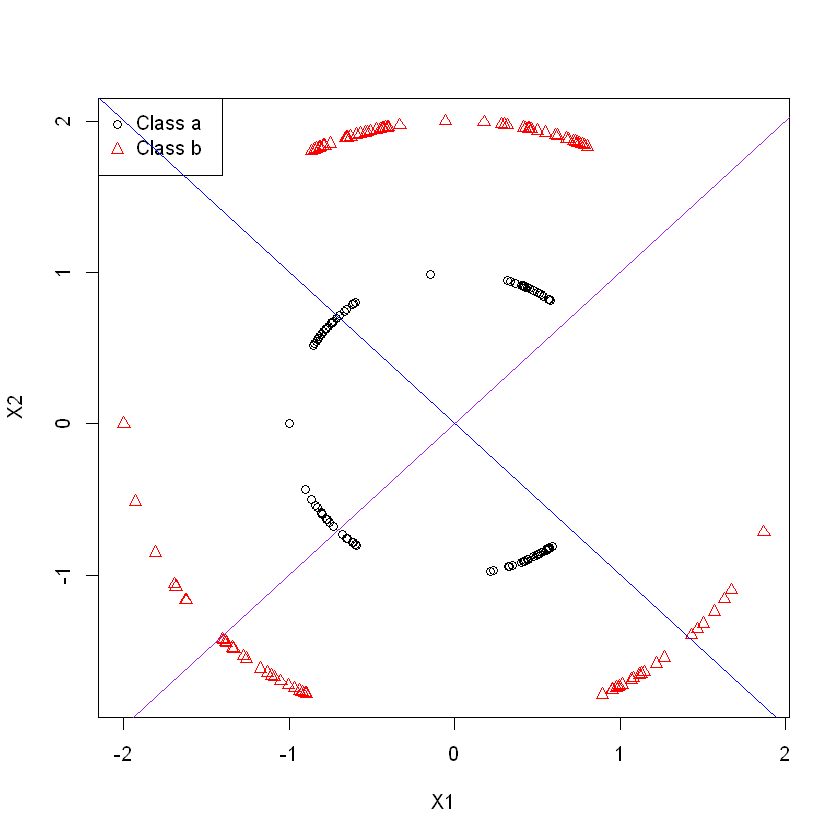

In [6]:
lev=as.numeric(dat[,3])
plot(dat[,1],dat[,2],col=lev,pch=lev,xlab=names(dat)[1],ylab=names(dat)[2])
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))
abline(a=0,b=(0.707/0.707), col="purple")
abline(a=0,b=(-0.707/0.707), col="blue")


Plot with rotation:

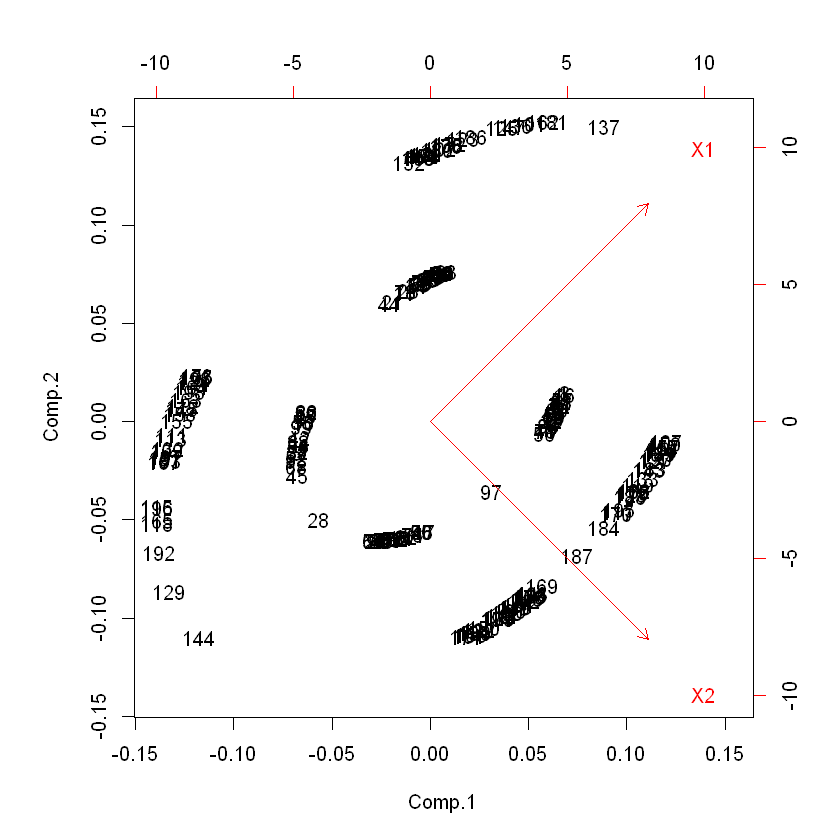

In [7]:
biplot(pca_q1)


To reduce the number of dimensions to one, the axis can be chosen arbitrarily since the proportion of variance explain is almost same. 

Assume first axis (0.707, 0.707) is chosen and data is transformed to 1D from 2D. 

In [8]:
pca_to1D = as.data.frame(pca_q1$scores[,1])
colnames(pca_to1D)[1] = "score"
head(pca_to1D)
pca_to1D$class = dat$class
head(pca_to1D)


score
0.96253438
0.87586545
-0.08329422
-0.30412288
-0.95331957
-0.19272994


score,class
0.96253438,a
0.87586545,a
-0.08329422,a
-0.30412288,a
-0.95331957,a
-0.19272994,a


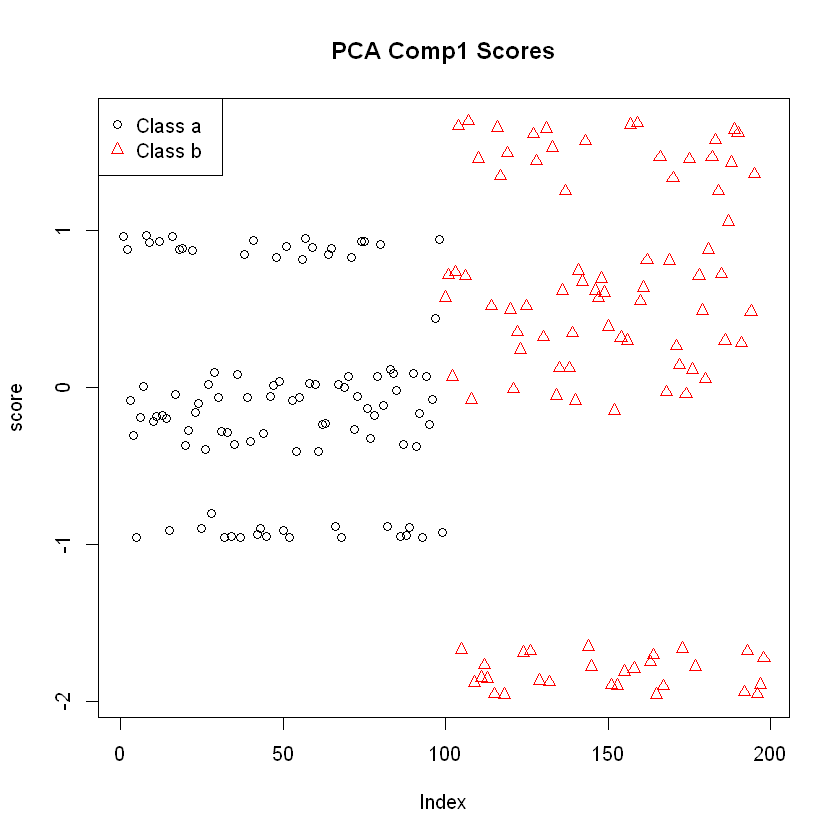

In [9]:
lev=as.numeric(pca_to1D[,2])
plot(pca_to1D[,1],col=lev,pch=lev, ylab=names(pca_to1D)[1], main="PCA Comp1 Scores")
legend("topleft",paste("Class",levels(pca_to1D[,2])),col=unique(lev), pch= unique(lev))


Assume second axis (0.707, -0.707) is chosen and data is transformed to 1D from 2D. 

In [10]:
pca_to1D_other = as.data.frame(pca_q1$scores[,2])
colnames(pca_to1D_other)[1] = "value"
head(pca_to1D_other)
pca_to1D_other$class = dat$class
head(pca_to1D_other)

value
0.1981970
0.0167920
0.9859873
-0.8446431
-0.2208078
-0.8264207


value,class
0.1981970,a
0.0167920,a
0.9859873,a
-0.8446431,a
-0.2208078,a
-0.8264207,a


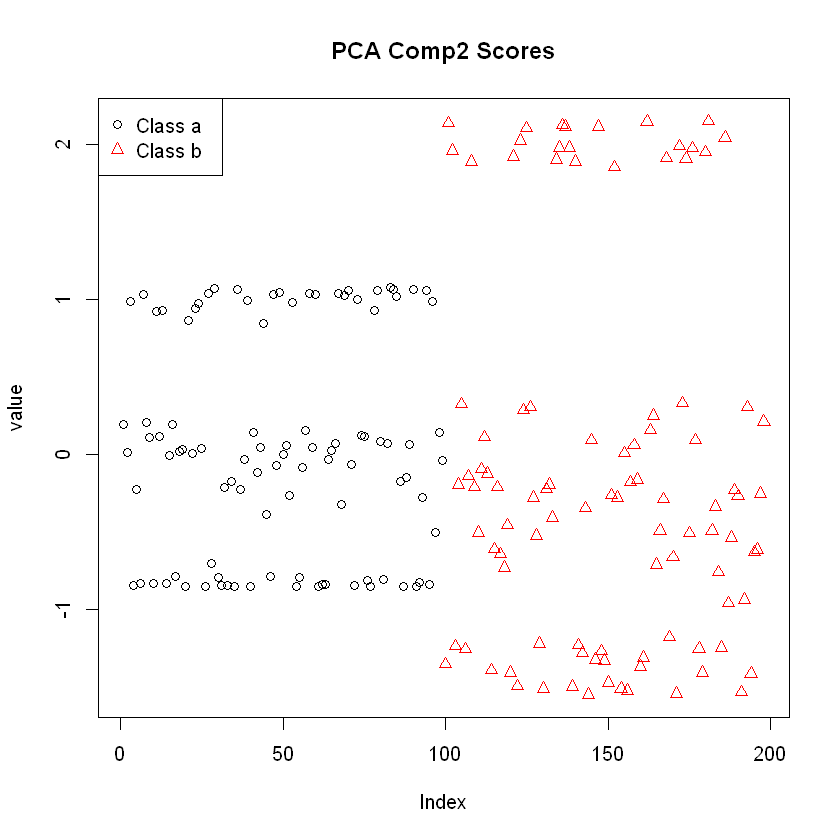

In [11]:
lev=as.numeric(pca_to1D_other[,2])
plot(pca_to1D_other[,1],col=lev,pch=lev, ylab=names(pca_to1D_other)[1], main="PCA Comp2 Scores")
legend("topleft",paste("Class",levels(pca_to1D_other[,2])),col=unique(lev), pch= unique(lev))

##### B

Also MDS is tried to reduce the dimensions to one.

First distance matrix is calculated with euclidean distances as a dist object.


In [12]:

distance_matrix_q1=dist(dat[-3], method = "euclidean")
str(distance_matrix_q1)
dist_subset(distance_matrix_q1, c("1", "2", "3", "4", "5", "6"))


 'dist' num [1:19503] 0.182 1.737 1.378 1.972 1.291 ...
 - attr(*, "Size")= int 198
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE
 - attr(*, "method")= chr "euclidean"
 - attr(*, "call")= language dist(x = dat[-3], method = "euclidean")


          1         2         3         4         5
2 0.1815607                                        
3 1.7374036 1.8201632                              
4 1.3776052 1.2402948 1.9419056                    
5 1.9723749 1.9341584 1.2647586 1.2016942          
6 1.2908138 1.1468008 1.9664823 0.1164944 1.2927754

First five rows and first five columns of the distance matrix is printed. The matrix is a lower triangular matrix that shows pairwise euclidean distances between each pair of data.

MDS value,class
-0.7220694,a
-0.8113465,a
1.0088009,a
-0.5095776,a
0.6920367,a
-0.5975895,a


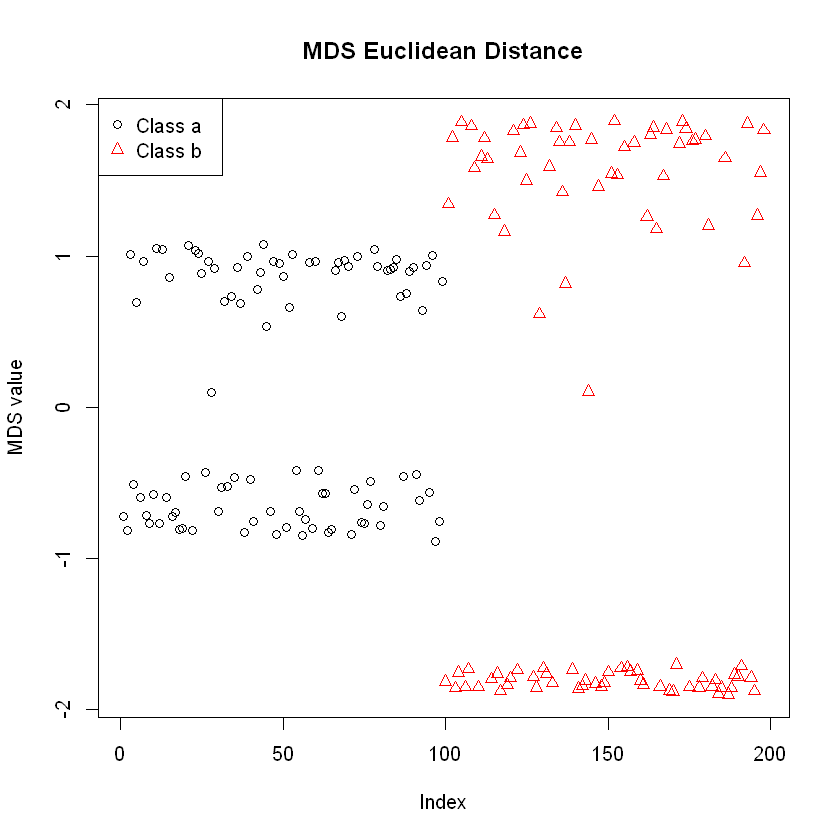

In [13]:
mds_q1=cmdscale(distance_matrix_q1, k=1, eig=T)

mds_to1D = as.data.frame(mds_q1$points)
colnames(mds_to1D)[1] = "MDS value"
mds_to1D$class = dat$class
head(mds_to1D)

lev=as.numeric(mds_to1D[,2])
plot(mds_to1D[,1],col=lev,pch=lev, ylab=names(mds_to1D)[1], main = "MDS Euclidean Distance")
legend("topleft",paste("Class",levels(mds_to1D[,2])),col=unique(lev), pch= unique(lev))

To observe another similarity measure MDS is also performed with Canberra distance.

In [14]:
distance_matrix_q1_canberra=dist(dat[-3], method = "canberra", diag = FALSE, upper = FALSE, p = 2)
str(distance_matrix_q1_canberra)


 'dist' num [1:19503] 0.213 1.154 1.147 2 1.081 ...
 - attr(*, "Size")= int 198
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE
 - attr(*, "method")= chr "canberra"
 - attr(*, "call")= language dist(x = dat[-3], method = "canberra", diag = FALSE, upper = FALSE, p = 2)


Canberra Distances

In [15]:
dist_subset(distance_matrix_q1_canberra, c("1", "2", "3", "4", "5", "6"))

          1         2         3         4         5
2 0.2126677                                        
3 1.1541222 1.0071369                              
4 1.1474499 1.1975333 2.0000000                    
5 2.0000000 2.0000000 1.2119740 1.0093513          
6 1.0810920 1.1321252 2.0000000 0.1178494 1.0600114

Euclidean Distances

In [16]:
dist_subset(distance_matrix_q1, c("1", "2", "3", "4", "5", "6"))

          1         2         3         4         5
2 0.1815607                                        
3 1.7374036 1.8201632                              
4 1.3776052 1.2402948 1.9419056                    
5 1.9723749 1.9341584 1.2647586 1.2016942          
6 1.2908138 1.1468008 1.9664823 0.1164944 1.2927754

Canberra Distance MDS

value,class
0.01484418,a
-0.02546038,a
0.98406919,a
-0.94953814,a
-0.08022111,a
-0.96365624,a


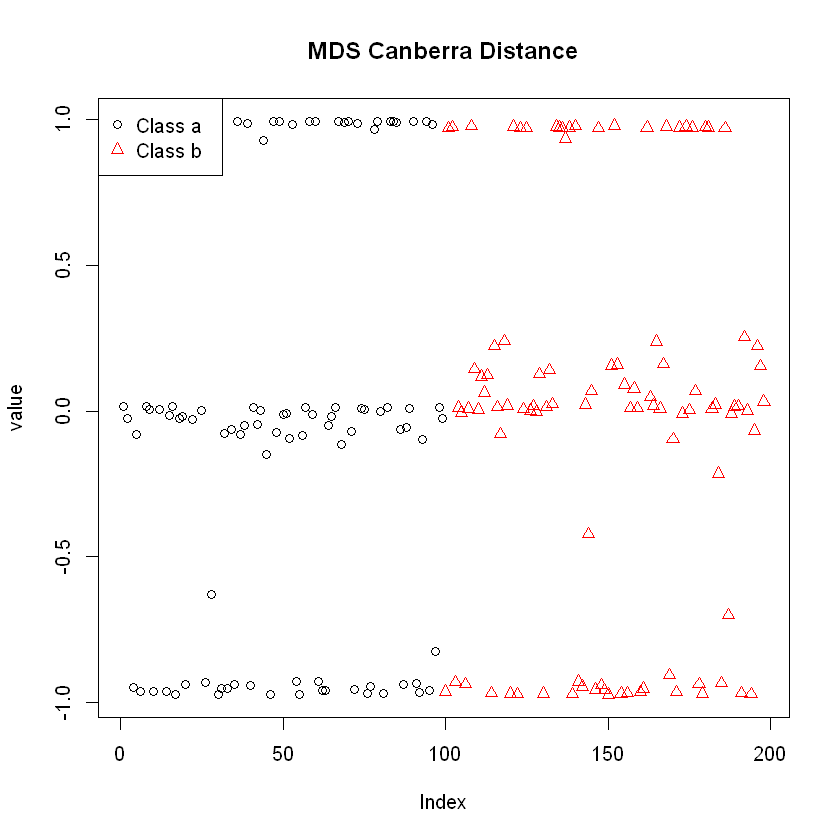

In [17]:
mds_q1_canberra=cmdscale(distance_matrix_q1_canberra, k=1, eig=T)

mds_to1D_canberra = as.data.frame(mds_q1_canberra$points)
colnames(mds_to1D_canberra)[1] = "value"
mds_to1D_canberra$class = dat$class
head(mds_to1D_canberra)

lev=as.numeric(mds_to1D_canberra[,2])
plot(mds_to1D_canberra[,1],col=lev,pch=lev, ylab=names(mds_to1D_canberra)[1], main="MDS Canberra Distance")
legend("topleft",paste("Class",levels(mds_to1D_canberra[,2])),col=unique(lev), pch= unique(lev))


In addition to Euclidean and Canberra distances Maximum distance is used.

In [18]:
distance_matrix_q1_maximum=dist(dat[-3], method = "maximum", diag = FALSE, upper = FALSE, p = 2)
str(distance_matrix_q1_maximum)
dist_subset(distance_matrix_q1_canberra, c("1", "2", "3", "4", "5", "6"))

 'dist' num [1:19503] 0.158 1.731 1.361 1.413 1.285 ...
 - attr(*, "Size")= int 198
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE
 - attr(*, "method")= chr "maximum"
 - attr(*, "call")= language dist(x = dat[-3], method = "maximum", diag = FALSE, upper = FALSE, p = 2)


          1         2         3         4         5
2 0.2126677                                        
3 1.1541222 1.0071369                              
4 1.1474499 1.1975333 2.0000000                    
5 2.0000000 2.0000000 1.2119740 1.0093513          
6 1.0810920 1.1321252 2.0000000 0.1178494 1.0600114

-0.6080000
-0.7125936
1.0295190
-0.3886525
0.6398140


value,class
-0.6080000,a
-0.7125936,a
1.0295190,a
-0.3886525,a
0.6398140,a
-0.4796046,a


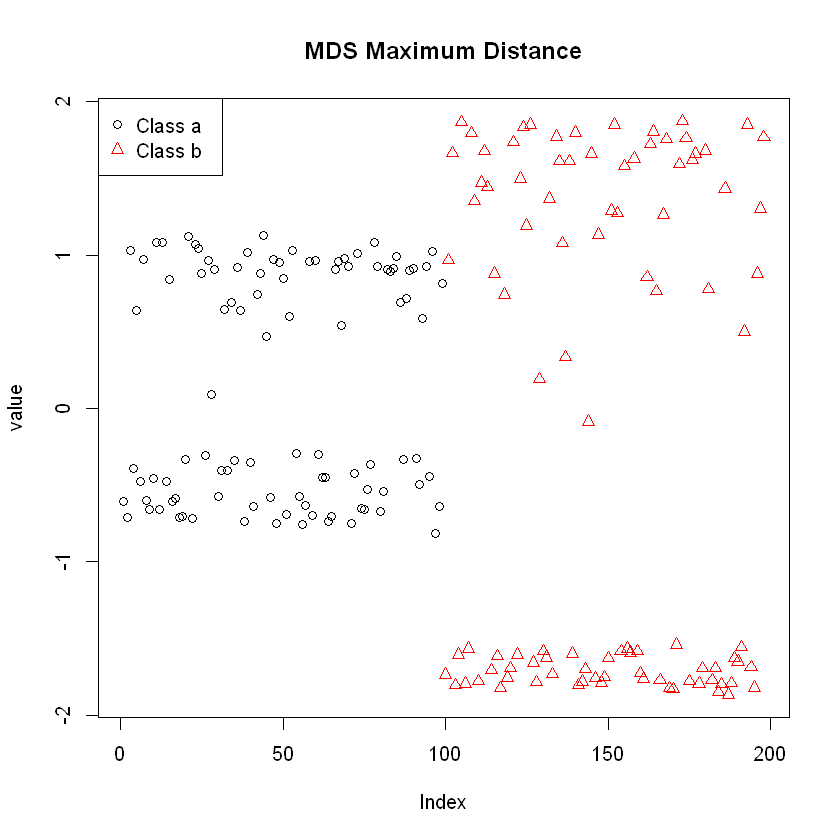

In [19]:
mds_q1_max=cmdscale(distance_matrix_q1_maximum, k=1, eig=T)
head(mds_q1_max$points,5)

mds_to1D_max = as.data.frame(mds_q1_max$points)
colnames(mds_to1D_max)[1] = "value"
mds_to1D_max$class = dat$class
head(mds_to1D_max)

lev=as.numeric(mds_to1D_max[,2])
plot(mds_to1D_max[,1],col=lev,pch=lev, ylab=names(mds_to1D_max)[1], main="MDS Maximum Distance")
legend("topleft",paste("Class",levels(mds_to1D_max[,2])),col=unique(lev), pch= unique(lev))

##### C

1. With Comp1 of PCA there are regions where classes are seperable and there are regions where they are mixed. Scores of PCA are randomly sampled and plotted below to clearly see those regions.

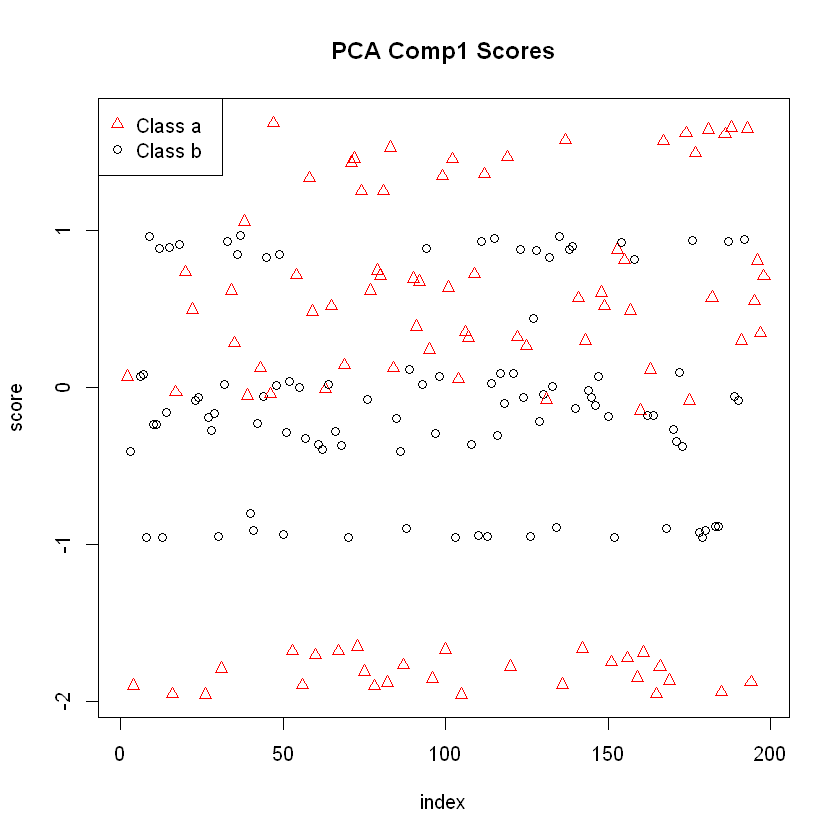

In [20]:

dummy_data = pca_to1D
dummy_data$index = 1:nrow(dummy_data)

set.seed(582)
i=(sample(nrow(dummy_data),198))

mixed_data = dummy_data[i,]

lev=as.numeric(mixed_data[,2])
plot(mixed_data[,1], col=lev, pch=lev, ylab=names(mixed_data)[1], xlab= names(mixed_data)[3], main ="PCA Comp1 Scores")
legend("topleft",paste("Class",levels(mixed_data[,2])),col=unique(lev), pch= unique(lev))


For Comp2 the result is similar there are regions where the observations are mixed and not mixed. The seperable and non-seperable regions of two plots are almost symmetric about X axis.

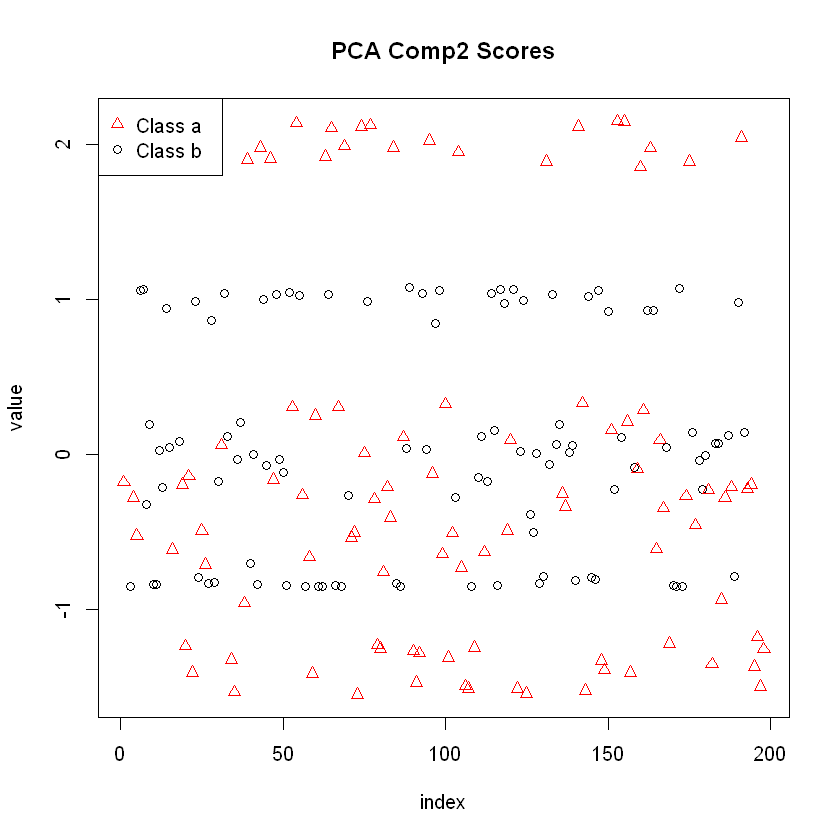

In [21]:

dummy_data = pca_to1D_other
dummy_data$index = 1:nrow(dummy_data)

set.seed(582)
i=(sample(nrow(dummy_data),198))

mixed_data = dummy_data[i,]

lev=as.numeric(mixed_data[,2])
plot(mixed_data[,1], col=lev, pch=lev, ylab=names(mixed_data)[1], xlab= names(mixed_data)[3], main ="PCA Comp2 Scores")
legend("topleft",paste("Class",levels(mixed_data[,2])),col=unique(lev), pch= unique(lev))

2. For the case of MDS different similarity measures are compared.

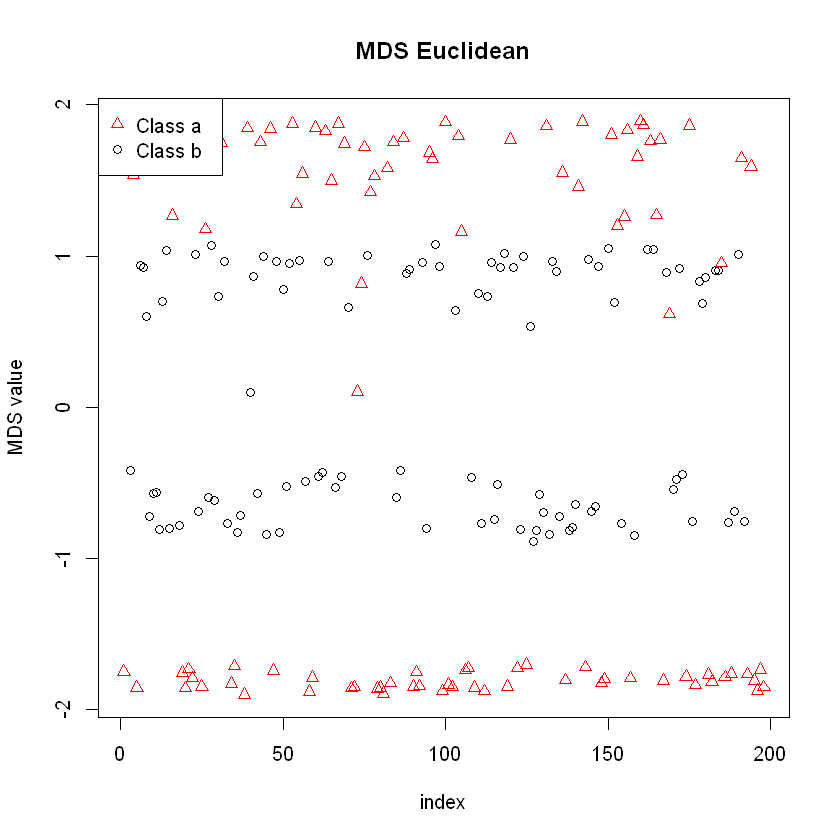

In [22]:

dummy_data = mds_to1D
dummy_data$index = 1:nrow(dummy_data)

set.seed(582)
i=(sample(nrow(dummy_data),198))

mixed_data = dummy_data[i,]

lev=as.numeric(mixed_data[,2])
plot(mixed_data[,1], col=lev, pch=lev, ylab=names(mixed_data)[1], xlab= names(mixed_data)[3], main ="MDS Euclidean")
legend("topleft",paste("Class",levels(mixed_data[,2])),col=unique(lev), pch= unique(lev))



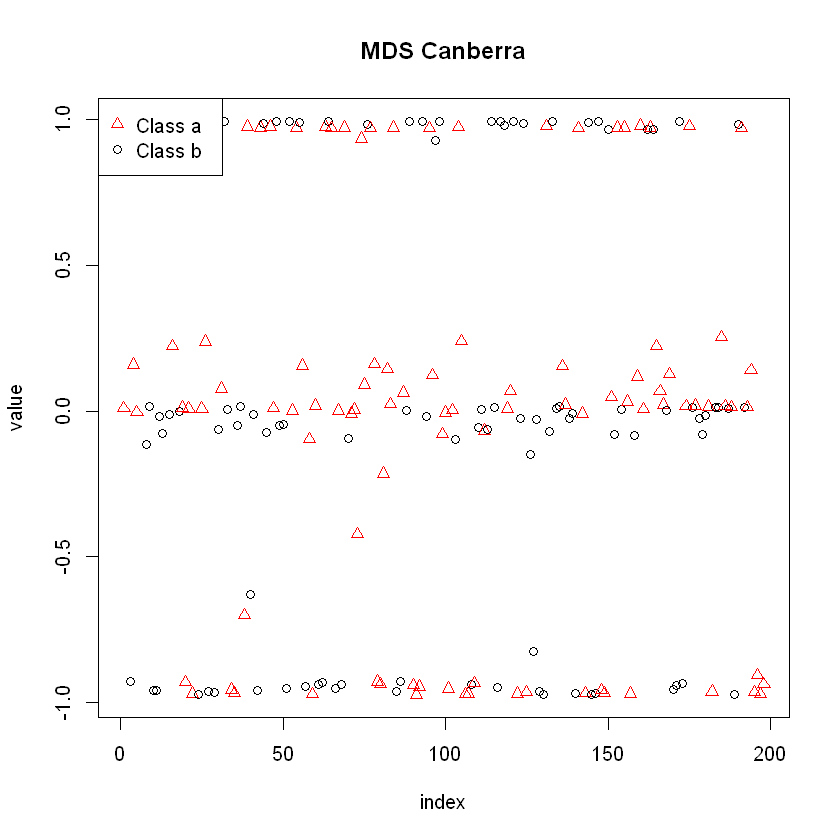

In [23]:

dummy_data = mds_to1D_canberra
dummy_data$index = 1:nrow(dummy_data)

set.seed(582)
i=(sample(nrow(dummy_data),198))

mixed_data = dummy_data[i,]

lev=as.numeric(mixed_data[,2])
plot(mixed_data[,1], col=lev, pch=lev, ylab=names(mixed_data)[1], xlab= names(mixed_data)[3], main ="MDS Canberra")
legend("topleft",paste("Class",levels(mixed_data[,2])),col=unique(lev), pch= unique(lev))


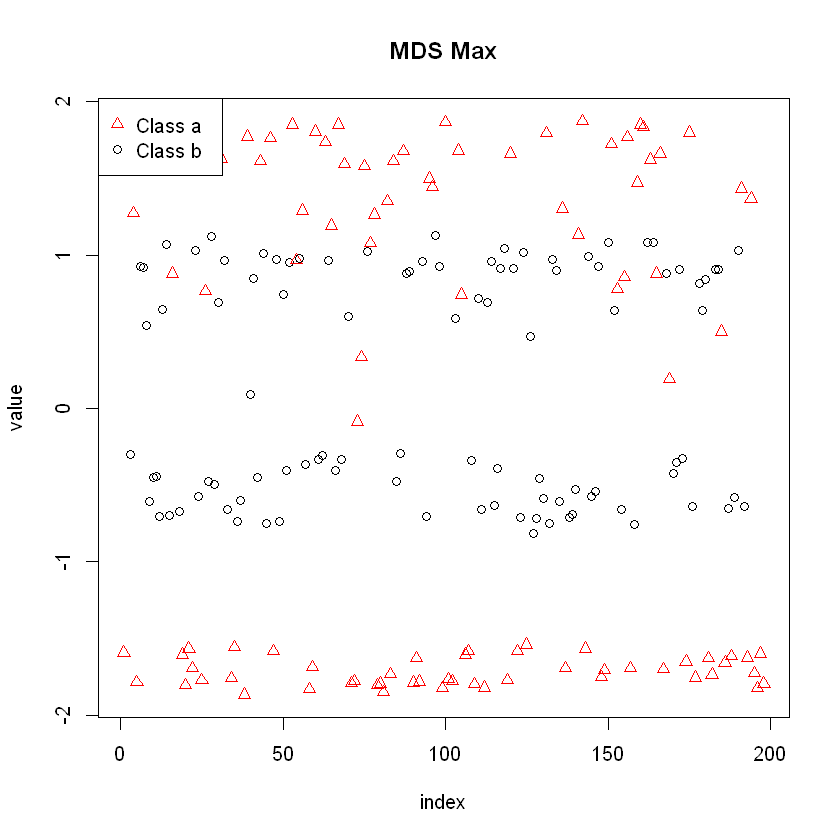

In [24]:

dummy_data = mds_to1D_max
dummy_data$index = 1:nrow(dummy_data)

set.seed(582)
i=(sample(nrow(dummy_data),198))

mixed_data = dummy_data[i,]

lev=as.numeric(mixed_data[,2])
plot(mixed_data[,1], col=lev, pch=lev, ylab=names(mixed_data)[1], xlab= names(mixed_data)[3], main ="MDS Max")
legend("topleft",paste("Class",levels(mixed_data[,2])),col=unique(lev), pch= unique(lev))

The euclidean distance MDS performed the best and Canberra distance MDS performed worst. Almost all points can be classified in the case of euclidean distance MDS. Non of them can be classified in the Canberra case. Maximum distance is also succesful although more points will be misclassified when compared to euclidean distance.

3. PCA did not yield sufficient results. This is expected since the data shows non-linear behavior. The success of MDS depends on the similarity measure used. Overall the best two methods are MDS euclidean and MDS maximum distance. PCA performed worse than those but better than MDS with Canberra distance.

##### D

Additional columns X1^2, X2^2 and X1X2 are added and PCA is applied

In [25]:
added_dat=dat
added_dat$X1sq=added_dat$X1*added_dat$X1
added_dat$X2sq=added_dat$X2*added_dat$X2
added_dat$X1X2=added_dat$X1*added_dat$X2
head(added_dat)

X1,X2,class,X1sq,X2sq,X1X2
0.5694828,0.8220033,a,0.3243106,0.6756894,0.4681167
0.4114692,0.9114237,a,0.1693069,0.8306931,0.3750228
0.4173846,-0.9087299,a,0.1742099,0.8257901,-0.3792899
-0.7918276,0.6107447,a,0.6269909,0.3730091,-0.4836045
-0.8067767,-0.5908565,a,0.6508886,0.3491114,0.4766892
-0.7154271,0.6986874,a,0.5118360,0.4881640,-0.4998599


In [26]:
pca_q1_added = princomp(added_dat[-3], cor=T)
summary(pca_q1_added, loadings=T)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.3114557 1.1508988 0.9723549 0.7988684 0.60979578
Proportion of Variance 0.3439832 0.2649136 0.1890948 0.1276382 0.07437018
Cumulative Proportion  0.3439832 0.6088968 0.7979917 0.9256298 1.00000000

Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
X1    0.419  0.556  0.128  0.571  0.415
X2    0.538 -0.454        -0.368  0.600
X1sq -0.539  0.162  0.578 -0.273  0.524
X2sq  0.351 -0.313  0.797  0.127 -0.356
X1X2 -0.348 -0.600         0.669  0.258

PCA results shows five eigenvectors which are five dimensional in the loadings section. Each eigenvector gives the direction for the principal component axis. If the importance of components section is examined it can be observed that first component has eigenvalue of 0.3439832 which also states the percentage of variance explained by this component. Similarly, Comp2 has 0.2649136, Comp3 has 0.1890948, Comp4 has 0.1276382 and Comp5 has 0.07437018. 

To reduce the dimension of data, first the threshold on the percentage of variance explained should be set. Then, by using the PCA results components can be chosen. For example almost 80% of the variance can be explained with first three components and 90% of variance is explained by first four.


##### TASK 2

In [27]:
il_data = read_excel("ilmesafe.xls",skip=2, col_names=TRUE)
head(il_data)


İL PLAKA NO,İL ADI,ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA,ANKARA,ANTALYA,ARTVİN,...,BATMAN,ŞIRNAK,BARTIN,ARDAHAN,IĞDIR,YALOVA,KARABÜK,KİLİS,OSMANİYE,DÜZCE
01,ADANA,NA,335,575,966,603,567,535,1035,...,621,709,782,1042,1066,899,714,246,87,735
02,ADIYAMAN,335,NA,910,648,632,814,870,751,...,303,471,1023,758,748,1147,955,210,248,976
03,AFYONKARAHİSAR,575,910,NA,1318,597,300,290,1243,...,1196,1284,515,1351,1461,338,447,821,662,375
04,AĞRI,966,648,1318,NA,738,1141,1428,396,...,369,430,1175,310,143,1363,1106,814,879,1192
05,AMASYA,603,632,597,736,NA,413,825,695,...,796,982,437,783,881,625,368,639,608,454
06,ANKARA,492,742,256,1054,333,NA,542,979,...,1001,1147,283,1087,1197,407,215,710,579,236


In [28]:
il_matrix = as.matrix(il_data[,-c(1,2)])
rownames(il_matrix) = colnames(il_matrix)
dim(il_matrix)
head(il_matrix)
tail(il_matrix)


[1] 81 81

,ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA,ANKARA,ANTALYA,ARTVİN,AYDIN,BALIKESİR,...,BATMAN,ŞIRNAK,BARTIN,ARDAHAN,IĞDIR,YALOVA,KARABÜK,KİLİS,OSMANİYE,DÜZCE
ADANA,NA,335,575,966,603,567,535,1035,874,903,...,621,709,782,1042,1066,899,714,246,87,735
ADIYAMAN,335,NA,910,648,632,814,870,751,1209,1238,...,303,471,1023,758,748,1147,955,210,248,976
AFYONKARAHİSAR,575,910,NA,1318,597,300,290,1243,345,328,...,1196,1284,515,1351,1461,338,447,821,662,375
AĞRI,966,648,1318,NA,738,1141,1428,396,1640,1569,...,369,430,1175,310,143,1363,1106,814,879,1192
AMASYA,603,632,597,736,NA,413,825,695,938,831,...,796,982,437,783,881,625,368,639,608,454
ANKARA,492,742,256,1054,333,NA,542,979,597,536,...,1001,1147,283,1087,1197,407,215,710,579,236


,ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA,ANKARA,ANTALYA,ARTVİN,AYDIN,BALIKESİR,...,BATMAN,ŞIRNAK,BARTIN,ARDAHAN,IĞDIR,YALOVA,KARABÜK,KİLİS,OSMANİYE,DÜZCE
IĞDIR,1069,751,1429,143,847,1165,1539,341,1751,1678,...,472,533,1284,228,NA,1506,1249,914,979,1335
YALOVA,899,1152,338,1361,625,407,601,1254,510,216,...,1411,1562,371,1362,1472,NA,350,1120,987,171
KARABÜK,714,960,447,1104,368,215,734,970,788,556,...,1164,1350,89,1078,1215,350,NA,928,801,179
KİLİS,246,210,821,814,644,715,781,917,1120,1149,...,469,557,1001,924,917,1125,933,NA,159,949
OSMANİYE,87,248,662,879,613,579,622,948,961,990,...,534,622,869,955,982,986,801,159,NA,822
DÜZCE,735,981,375,1190,454,236,638,1083,671,377,...,1240,1391,200,1191,1301,171,179,954,822,NA


Only lower triangle is used since the matrix is not symmetric.

In [29]:
lower_tri_mat = il_matrix
lower_tri_mat[upper.tri(lower_tri_mat)]=0
head(lower_tri_mat)
tail(lower_tri_mat)

,ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA,ANKARA,ANTALYA,ARTVİN,AYDIN,BALIKESİR,...,BATMAN,ŞIRNAK,BARTIN,ARDAHAN,IĞDIR,YALOVA,KARABÜK,KİLİS,OSMANİYE,DÜZCE
ADANA,NA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADIYAMAN,335,NA,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AFYONKARAHİSAR,575,910,NA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AĞRI,966,648,1318,NA,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AMASYA,603,632,597,736,NA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ANKARA,492,742,256,1054,333,NA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA,ANKARA,ANTALYA,ARTVİN,AYDIN,BALIKESİR,...,BATMAN,ŞIRNAK,BARTIN,ARDAHAN,IĞDIR,YALOVA,KARABÜK,KİLİS,OSMANİYE,DÜZCE
IĞDIR,1069,751,1429,143,847,1165,1539,341,1751,1678,...,472,533,1284,228,NA,0,0,0,0,0
YALOVA,899,1152,338,1361,625,407,601,1254,510,216,...,1411,1562,371,1362,1472,NA,0,0,0,0
KARABÜK,714,960,447,1104,368,215,734,970,788,556,...,1164,1350,89,1078,1215,350,NA,0,0,0
KİLİS,246,210,821,814,644,715,781,917,1120,1149,...,469,557,1001,924,917,1125,933,NA,0,0
OSMANİYE,87,248,662,879,613,579,622,948,961,990,...,534,622,869,955,982,986,801,159,NA,0
DÜZCE,735,981,375,1190,454,236,638,1083,671,377,...,1240,1391,200,1191,1301,171,179,954,822,NA


Distance information transformed into a dist object in the form of a lower triangular matrix. 

In [30]:
il_distance = as.dist(lower_tri_mat, upper=TRUE)
str(il_distance)
(il_distance)

 'dist' num [1:3240] 335 575 966 603 492 ...
 - attr(*, "Labels")= chr [1:81] "ADANA" "ADIYAMAN" "AFYONKARAHİSAR" "AĞRI" ...
 - attr(*, "Size")= int 81
 - attr(*, "call")= language as.dist.default(m = lower_tri_mat, upper = TRUE)
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi TRUE


                    ADANA ADIYAMAN AFYONKARAHİSAR AĞRI AMASYA ANKARA ANTALYA
ADANA                          335            575  966    603    492     535
ADIYAMAN              335                     910  648    632    742     870
AFYONKARAHİSAR        575      910                1318    597    256     291
AĞRI                  966      648           1318         736   1054    1428
AMASYA                603      632            597  736           333     825
ANKARA                492      742            256 1054    333            543
ANTALYA               535      870            291 1428    825    543        
ARTVİN               1035      751           1243  396    693    979    1466
AYDIN                 874     1209            345 1640    938    597     339
BALIKESİR             903     1238            328 1567    831    536     507
BİLECİK               773     1045            212 1358    622    316     475
BİNGÖL                636      348           1095  356    641    892    1171

MDS is applied and resulting points are below.

In [31]:
mds_turkey=cmdscale(il_distance, k=2, eig=T)
mds_turkey$points

ADANA,75.80127,-378.52239
ADIYAMAN,413.32294,-291.49373
AFYONKARAHİSAR,-469.01602,-164.44077
AĞRI,769.80750,247.83978
AMASYA,17.41702,199.57308
ANKARA,-267.06178,24.95882
ANTALYA,-450.26071,-488.68095
ARTVİN,633.45573,449.70537
AYDIN,-756.16158,-317.64194
BALIKESİR,-776.56410,-30.54855
BİLECİK,-566.47985,49.91731


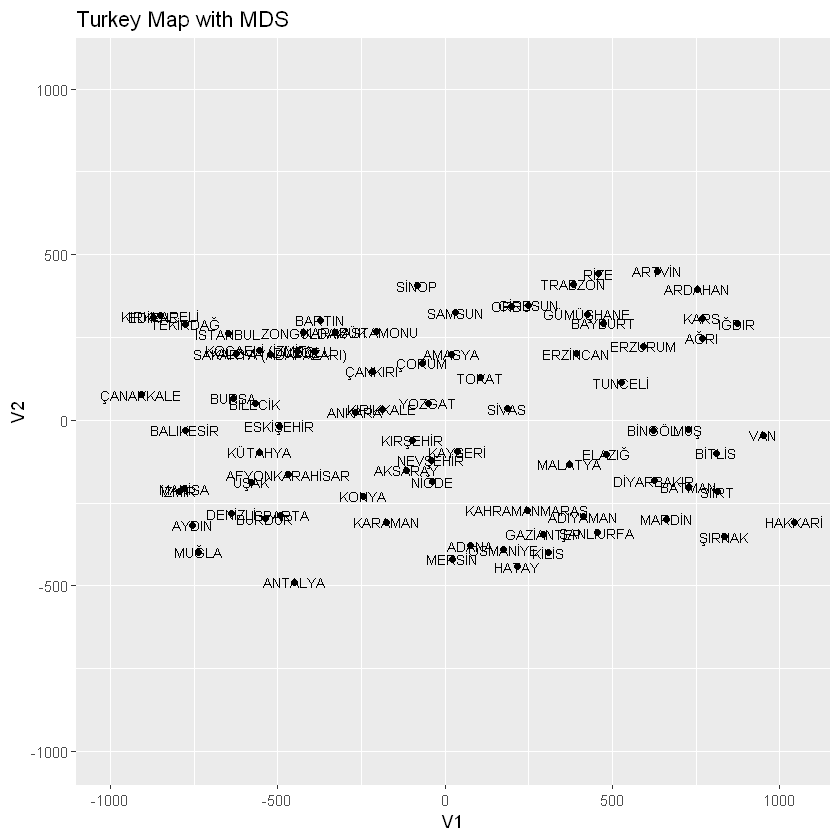

In [32]:
(ggplot(mapping = aes(x=V1 , y=V2),data=as.data.frame(mds_turkey$points))+geom_point( )
 +xlim(-1000, 1050)+ylim(-1000,1050)
 +geom_text(aes(label=rownames(as.data.frame(mds_turkey$points))), size=3)
+labs(title="Turkey Map with MDS"))


The MDS map looks very similar to the actual Turkey map. Most of the cities located correctly. Due to loss of information there are mislocations. For example, in the actual map Hatay is more to the south. Obviously, gulfs can not be clearly observed. The distance between Van and Ağrı looks larger than the original.  

##### TASK 3

##### A

The data which is collect from an accelerometer is read into three independent tables. There 8 different gestures measured at 315 time points.

In [33]:
x = read.table("uWaveGestureLibrary_X_TRAIN")
y = read.table("uWaveGestureLibrary_Y_TRAIN")
z = read.table("uWaveGestureLibrary_Z_TRAIN")

In [34]:
print("X")
head(x)
print("Y")
head(y)
print("Z")
head(z)


[1] "X"


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
6,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,-0.7964140,-0.7417282,-0.6946985,-0.6476688,-0.6476688,-0.64766875,-0.64766875,-0.64766875,-0.64766875,-0.64766875
5,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.2376337,-0.2376337,-0.2376337,-0.2376337,-0.2376337,-0.23763371,-0.23763371,-0.23763371,-0.23763371,-0.23763371
5,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.2820107,-0.2369291,-0.1918477,-0.1467662,-0.1016848,-0.06120346,-0.05663826,-0.05546207,-0.05546207,-0.05546207
3,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,1.2072899,1.1478218,1.0943436,1.0603618,1.0531583,1.04446710,1.01898080,0.90994938,0.79101316,0.67207694
4,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,-1.4369826,-1.4369826,-1.4369826,-1.4369826,-1.4369826,-1.44034250,-1.45251250,-1.46844580,-1.48437920,-1.50031250
8,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,...,0.5784697,0.5877041,0.5969386,0.6061730,0.6207059,0.63523879,0.65370767,0.67217655,0.69064543,0.70911432


[1] "Y"


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
6,-2.1193958,-2.1193958,-2.1193958,-2.1193958,-2.1193958,-2.1193958,-2.1193958,-2.1193958,-2.1193958,...,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335
5,0.6666239,0.6666239,0.6666239,0.6666239,0.6666239,0.6666239,0.6666239,0.6666239,0.6666239,...,-1.51726140,-1.55496780,-1.59267430,-1.62987010,-1.66252390,-1.66252390,-1.66252390,-1.66252390,-1.66252390,-1.66252390
5,-0.1897302,-0.1897302,-0.1897302,-0.1897302,-0.1897302,-0.1897302,-0.1897302,-0.1897302,-0.1897302,...,-1.49248970,-1.49248970,-1.49248970,-1.49248970,-1.49248970,-1.49248970,-1.49248970,-1.49248970,-1.49248970,-1.49248970
3,0.3740667,0.3740667,0.3740667,0.3740667,0.3740667,0.3740667,0.3740667,0.3740667,0.3740667,...,-1.53169760,-1.63940370,-1.74784270,-1.83756330,-1.90157430,-1.93363630,-1.91732350,-1.66037750,-1.37490280,-1.08942800
4,-0.3974369,-0.3974369,-0.3974369,-0.3974369,-0.3974369,-0.3974369,-0.3974369,-0.3974369,-0.3974369,...,-2.18080690,-2.22243160,-2.24174530,-2.24174530,-2.24174530,-2.22951440,-2.18521200,-2.12721040,-2.06920870,-2.01120700
8,-1.0800804,-1.0800804,-1.0800804,-1.0800804,-1.0800804,-1.0800804,-1.0800804,-1.0800804,-1.0800804,...,0.11281392,0.11281392,0.11281392,0.11281392,0.12389440,0.13497489,0.15428659,0.17359829,0.19290999,0.21222169


[1] "Z"


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
6,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,...,0.5232168,0.5139944,0.50348075,0.49296714,0.47452222,0.4560773,0.4376324,0.4191875,0.4007426,0.3822976
5,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,...,-0.4270104,-0.4270104,-0.42701043,-0.42717222,-0.42877307,-0.4407199,-0.4526667,-0.4646135,-0.4765603,-0.4885071
5,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,...,-0.8627172,-0.8627172,-0.86271720,-0.86271720,-0.86271720,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172
3,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,...,-0.1873845,-0.1235489,-0.05587047,0.01180812,0.07948656,0.1570561,0.2537396,0.4455027,0.6485381,0.8515735
4,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,...,1.8674725,1.8343190,1.75599960,1.63858220,1.52116390,1.4532661,1.5152189,1.6326367,1.7500543,1.8674725
8,0.6564008,0.6564008,0.6564008,0.6564008,0.6564008,0.6564008,0.6564008,0.6564008,0.6564008,...,0.6979770,0.6654623,0.63294758,0.60043289,0.55859021,0.5167475,0.4679755,0.4192035,0.3704314,0.3216594


X, Y and X coordinates seperated according to the gesture classes.

In [35]:

print("Class 1 x")
class1_x = x[x$V1==1,]
head(class1_x)
class1_x = class1_x[,-1]

print("Class 2 x")
class2_x = x[x$V1==2,]
head(class2_x)
class2_x = class2_x[,-1]

print("Class 3 x")
class3_x = x[x$V1==3,]
head(class3_x)
class3_x = class3_x[,-1]


print("Class 4 x")
class4_x = x[x$V1==4,]
head(class4_x)
class4_x = class4_x[,-1]



print("Class 5 x")
class5_x = x[x$V1==5,]
head(class5_x)
class5_x = class5_x[,-1]



print("Class 6 x")
class6_x = x[x$V1==6,]
head(class6_x)
class6_x = class6_x[,-1]


print("Class 7 x")
class7_x = x[x$V1==7,]
head(class7_x)
class7_x = class7_x[,-1]



print("Class 8 x")
class8_x = x[x$V1==8,]
head(class8_x)
class8_x = class8_x[,-1]


[1] "Class 1 x"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
11,1,-0.7914472,-0.7914472,-0.7958727,-0.8100650,-0.8492300,-0.9034648,-0.9311463,-0.9506034,-0.9506034,...,0.09581628,0.08391307,0.08391307,0.08391307,0.08391307,0.08391307,0.08391307,0.08391307,0.08391307,0.08391307
17,1,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,...,-0.68035186,-0.64228850,-0.59668832,-0.54541065,-0.51043787,-0.48153849,-0.45589969,-0.45097050,-0.44960244,-0.44960244
19,1,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,...,0.52762986,0.53626304,0.53626304,0.53626304,0.53626304,0.53626304,0.53626304,0.53626304,0.53626304,0.53626304
23,1,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,...,0.28807356,0.27569795,0.25692066,0.23814336,0.21936607,0.20058877,0.18181143,0.16303409,0.14425675,0.12547941
38,1,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,...,-0.17307817,-0.17307817,-0.17307817,-0.17307817,-0.17307817,-0.17307817,-0.17307817,-0.17307817,-0.17307817,-0.17307817
43,1,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,...,0.41979075,0.45357809,0.46952605,0.46952605,0.46952605,0.46952605,0.47339842,0.49184322,0.53073887,0.56963450


[1] "Class 2 x"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
15,2,1.19950680,1.19950680,1.23321680,1.32567850,1.36320540,1.37872270,1.37872270,1.37872270,1.37872270,...,-0.9576488,-0.91016949,-0.8767805,-0.854521240,-0.84167931,-0.7946993,-0.7441877,-0.69367626,-0.643164710,-0.59265311
20,2,0.13857648,0.13857648,0.13857648,0.13857648,0.13857648,0.13857648,0.13857648,0.13857648,0.13857648,...,-0.1572911,-0.08324159,-0.0275345,0.009091271,0.08933642,0.1385765,0.1385765,0.13857648,0.138576480,0.13857648
29,2,0.41283289,0.41283289,0.41283289,0.41283289,0.41283289,0.41283289,0.41283289,0.41283289,0.41283289,...,-1.5253670,-1.54541350,-1.5576772,-1.557677200,-1.55767720,-1.5576772,-1.5467873,-1.53109850,-1.491784400,-1.44820450
31,2,0.02397005,0.02397005,0.02397005,0.02397005,0.02397005,0.02397005,0.02397005,0.02397005,0.02397005,...,-2.0471001,-1.98729450,-1.8983189,-1.809343100,-1.71753130,-1.5982542,-1.4227858,-1.32349450,-1.234518800,-1.14554300
58,2,-1.19775460,-1.19775460,-1.19775460,-1.19775460,-1.19775460,-1.19775460,-1.19775460,-1.19775460,-1.19775460,...,-0.5846932,-0.56876093,-0.5528922,-0.542190780,-0.53391146,-0.5184293,-0.4942813,-0.47561373,-0.475613730,-0.47561373
60,2,0.14714955,0.14714955,0.14714955,0.14714955,0.14714955,0.14714955,0.14714955,0.14714955,0.14714955,...,-0.9419498,-0.80476960,-0.6675895,-0.530409340,-0.39794235,-0.2658601,-0.1639266,-0.06359035,0.005798314,0.07438833


[1] "Class 3 x"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
4,3,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,1.2072899,1.1478218,1.0943436,1.0603618,1.0531583,1.0444671,1.0189808,0.9099494,0.7910132,0.6720769
13,3,-0.595755260,-0.595755260,-0.595755260,-0.595755260,-0.595755260,-0.595755260,-0.595755260,-0.595755260,-0.595755260,...,0.4742159,0.4605124,0.4468089,0.4331054,0.4194018,0.4056983,0.3919948,0.3782913,0.3645877,0.3508842
27,3,-0.690376480,-0.690376480,-0.690376480,-0.690376480,-0.690376480,-0.690376480,-0.690376480,-0.690376480,-0.690376480,...,1.3567012,1.3472722,1.3245340,1.2969722,1.2694105,1.2655374,1.2766636,1.3042253,1.3317870,1.3593488
61,3,-1.045878600,-1.045878600,-1.045878600,-1.045878600,-1.045878600,-1.045878600,-1.045878600,-1.045878600,-1.045878600,...,0.5250735,0.5250735,0.5250735,0.5250735,0.5250735,0.5250735,0.5250735,0.5250735,0.5250735,0.5250735
80,3,-1.235182400,-1.235182400,-1.235182400,-1.235182400,-1.235182400,-1.235182400,-1.235182400,-1.235182400,-1.235182400,...,1.0094752,1.0196369,1.0297986,1.0399604,1.0581523,1.0766612,1.0969388,1.1172623,1.1375858,1.1579093
94,3,-0.710342920,-0.710342920,-0.710342920,-0.710342920,-0.710342920,-0.710342920,-0.710342920,-0.710342920,-0.710342920,...,0.7079883,0.7092576,0.7144757,0.7196938,0.7249119,0.7301299,0.7353480,0.7405661,0.7457842,0.7510023


[1] "Class 4 x"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
5,4,1.2861978,1.2861978,1.2861978,1.2861978,1.2861978,1.2861978,1.2861978,1.2861978,1.2861978,...,-1.4369826,-1.4369826,-1.4369826,-1.4369826,-1.4369826,-1.4403425,-1.4525125,-1.4684458,-1.4843792,-1.5003125
8,4,0.3053030,0.3053030,0.3053030,0.3053030,0.3053030,0.3053030,0.3053030,0.3053030,0.3053030,...,-1.1216862,-1.1085478,-1.1010341,-1.1010341,-1.1010341,-1.0952516,-1.0815665,-1.0622180,-1.0425612,-1.0229043
9,4,0.9808104,0.9808104,0.9808104,0.9808104,0.9808104,0.9808104,0.9808104,0.9808104,0.9808104,...,-1.4726366,-1.4866785,-1.4956748,-1.4967205,-1.4934008,-1.4863800,-1.4793591,-1.4723382,-1.4653174,-1.4582966
34,4,0.5423735,0.5423735,0.5423735,0.5423735,0.5423735,0.5423735,0.5423735,0.5423735,0.5423735,...,-0.7332651,-0.7332651,-0.7238311,-0.7080346,-0.6898601,-0.6716856,-0.6535110,-0.6353364,-0.6171619,-0.5989873
51,4,1.1845220,1.1845220,1.1845220,1.1845220,1.1845220,1.1845220,1.1845220,1.1845220,1.1845220,...,-1.5318195,-1.5480244,-1.5642292,-1.5804341,-1.5966390,-1.6128438,-1.6290487,-1.6452536,-1.6614585,-1.6776633
52,4,1.2051478,1.2051478,1.2051478,1.2051478,1.2051478,1.2051478,1.2051478,1.2051478,1.2051478,...,-0.7944531,-0.7691564,-0.7438598,-0.7185632,-0.6974788,-0.6799658,-0.6658295,-0.6531811,-0.6405329,-0.6278845


[1] "Class 5 x"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
2,5,1.6273111,1.6273111,1.6273111,1.6273111,1.6273111,1.6273111,1.6273111,1.6273111,1.6273111,...,-0.2376337,-0.23763371,-0.237633710,-0.23763371,-0.2376337,-0.23763371,-0.23763371,-0.23763371,-0.23763371,-0.23763371
3,5,0.6612765,0.6612765,0.6612765,0.6612765,0.6612765,0.6612765,0.6612765,0.6612765,0.6612765,...,-0.2820107,-0.23692911,-0.191847670,-0.14676624,-0.1016848,-0.06120346,-0.05663826,-0.05546207,-0.05546207,-0.05546207
14,5,-0.1727133,-0.1727133,-0.1727133,-0.1727133,-0.1727133,-0.1727133,-0.1727133,-0.1727133,-0.1727133,...,-0.0270371,-0.02703710,-0.027037095,-0.02703710,-0.0270371,-0.02703710,-0.02703710,-0.02703710,-0.02703710,-0.02703710
35,5,-0.1050939,-0.1050939,-0.1050939,-0.1050939,-0.1050939,-0.1050939,-0.1050939,-0.1050939,-0.1050939,...,1.0337810,1.13791620,1.242051300,1.34618650,1.4157437,1.44219070,1.45197460,1.45197460,1.45197460,1.45197460
41,5,-0.0802111,-0.0802111,-0.0802111,-0.0802111,-0.0802111,-0.0802111,-0.0802111,-0.0802111,-0.0802111,...,-2.3626061,-2.43670320,-2.510800200,-2.58489730,-2.6589944,-2.73309140,-2.80718830,-2.88128520,-2.95538210,-3.02947900
45,5,1.4915011,1.4915011,1.4915011,1.4915011,1.4915011,1.4915011,1.4915011,1.4915011,1.4915011,...,-0.1193634,-0.06642971,-0.001732957,0.07590315,0.1535392,0.23117533,0.30881136,0.38644736,0.46408333,0.54171931


[1] "Class 6 x"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
1,6,-0.3042432,-0.3042432,-0.3042432,-0.3042432,-0.3042432,-0.3042432,-0.3042432,-0.3042432,-0.3042432,...,-0.7964140,-0.7417282,-0.6946985,-0.64766875,-0.64766875,-0.64766875,-0.6476688,-0.6476688,-0.6476688,-0.6476688
10,6,-1.1770783,-1.1770783,-1.1770783,-1.1770783,-1.1770783,-1.1770783,-1.1770783,-1.1770783,-1.1770783,...,0.9819959,0.9639255,0.9458551,0.92778469,0.95800363,0.99012873,1.0261678,1.0623086,1.0984493,1.1345901
16,6,0.8205179,0.8205179,0.8205179,0.8205179,0.8205179,0.8205179,0.8205179,0.8205179,0.8205179,...,-0.6886122,-0.6442982,-0.6006039,-0.58665894,-0.58665894,-0.58665894,-0.5866589,-0.5866589,-0.5866589,-0.5866589
18,6,-0.1356258,-0.1356258,-0.1356258,-0.1356258,-0.1356258,-0.1356258,-0.1356258,-0.1356258,-0.1356258,...,3.3281490,3.4681410,3.5521078,3.63607460,3.72004140,3.71351690,3.6791927,3.5952259,3.5112591,3.4272924
22,6,1.5880751,1.5880751,1.5880751,1.5880751,1.5880751,1.5880751,1.5880751,1.5880751,1.5880751,...,-0.1516382,-0.1283920,-0.1051458,-0.08189961,-0.07537633,-0.08489911,-0.1081453,-0.1313915,-0.1546377,-0.1778839
28,6,1.1972450,1.1972450,1.1972450,1.1972450,1.1972450,1.1972450,1.1972450,1.1972450,1.1972450,...,-0.2098230,-0.3277336,-0.4456443,-0.55954439,-0.65395315,-0.65395315,-0.6539531,-0.6539531,-0.6539531,-0.6539531


[1] "Class 7 x"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
7,7,1.47432770,1.47432770,1.47432770,1.47432770,1.47432770,1.47432770,1.47432770,1.47432770,1.47432770,...,-0.2913174,-0.2726691,-0.2388310,-0.1882842,-0.1240316,-0.05091041,0.02565178,0.1034350,0.2089395,0.3186212
12,7,0.03709836,0.03709836,0.03709836,0.03709836,0.03709836,0.03709836,0.03709836,0.03709836,0.03709836,...,0.1961779,0.1912681,0.1912681,0.1912681,0.1912681,0.19126807,0.19126807,0.1912681,0.1912681,0.1912681
24,7,0.51106109,0.51106109,0.51106109,0.51106109,0.51106109,0.51106109,0.51106109,0.51106109,0.51106109,...,0.1780322,0.2205264,0.2562263,0.2911660,0.3199944,0.34832388,0.36634012,0.3838100,0.3980579,0.4122226
26,7,-0.74327299,-0.74327299,-0.74327299,-0.74327299,-0.74327299,-0.74327299,-0.74327299,-0.74327299,-0.74327299,...,-0.8485319,-0.7859602,-0.7238250,-0.6619161,-0.6007638,-0.54601335,-0.49126295,-0.4365126,-0.3817622,-0.3270118
32,7,1.07416080,1.07416080,1.07416080,1.07416080,1.07416080,1.07416080,1.07416080,1.07416080,1.07416080,...,-0.2246277,-0.2295911,-0.3031737,-0.4032682,-0.5033628,-0.60345741,-0.70284007,-0.7738664,-0.8239137,-0.8739610
39,7,1.44445650,1.44445650,1.44445650,1.44445650,1.44445650,1.44445650,1.44445650,1.44445650,1.44445650,...,0.1776605,0.1925427,0.2074250,0.2126210,0.2157778,0.21719613,0.21719613,0.2171961,0.2171961,0.2171961


[1] "Class 8 x"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
6,8,-0.4792525,-0.4792525,-0.4792525,-0.4792525,-0.4792525,-0.4792525,-0.4792525,-0.4792525,-0.4792525,...,0.5784697,0.5877041,0.5969386,0.6061730,0.6207059,0.6352388,0.65370767,0.672176550,0.69064543,0.70911432
21,8,-0.5005661,-0.5005661,-0.5005661,-0.5005661,-0.5005661,-0.5005661,-0.5005661,-0.5005661,-0.5005661,...,0.4225311,0.4430586,0.4403022,0.4290031,0.4116831,0.4058525,0.40714504,0.419012500,0.43568157,0.45620907
25,8,-0.6343623,-0.6343623,-0.6343623,-0.6343623,-0.6343623,-0.6343623,-0.6343623,-0.6343623,-0.6343623,...,1.0355423,0.9957251,0.9416900,0.8828724,0.8312107,0.7867186,0.74475223,0.709232950,0.67982422,0.65041548
33,8,1.0491965,1.0621332,1.0750698,1.0854786,1.0958874,1.0958874,1.0958874,1.0958874,1.0958874,...,1.2832457,1.3091189,1.3034684,1.2978180,1.2719447,1.2460715,1.19938060,1.152689800,1.10094320,1.04919650
37,8,-0.2023839,-0.2023839,-0.2023839,-0.2023839,-0.2023839,-0.2023839,-0.2023839,-0.2023839,-0.2023839,...,0.3475917,0.3059666,0.2591437,0.2041304,0.1491170,0.0941037,0.04872131,0.007583056,-0.02200841,-0.04951504
40,8,-0.2174123,-0.2174123,-0.2174123,-0.2174123,-0.2174123,-0.2174123,-0.2496209,-0.2900378,-0.3486763,...,1.0033216,0.9884408,0.9591216,0.9298024,0.9004832,0.8711640,0.84184480,0.812525590,0.78320638,0.75388717


In [36]:
  
print("Class 1 y")
class1_y = y[y$V1==1,]
head(class1_y)
class1_y = class1_y[,-1]


print("Class 2 y")
class2_y = y[y$V1==2,]
head(class2_y)
class2_y = class2_y[,-1]

print("Class 3 y")
class3_y = y[y$V1==3,]
head(class3_y)
class3_y = class3_y[,-1]


print("Class 4 y")
class4_y = y[y$V1==4,]
head(class4_y)
class4_y = class4_y[,-1]



print("Class 5 y")
class5_y = y[y$V1==5,]
head(class5_y)
class5_y = class5_y[,-1]



print("Class 6 y")
class6_y = y[y$V1==6,]
head(class6_y)
class6_y = class6_y[,-1]


print("Class 7 y")
class7_y = y[y$V1==7,]
head(class7_y)
class7_y = class7_y[,-1]



print("Class 8 y")
class8_y = y[y$V1==8,]
head(class8_y)
class8_y= class8_y[,-1]

[1] "Class 1 y"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
11,1,-1.9599838,-1.9599838,-1.9566005,-1.9457505,-1.9158091,-1.8743468,-1.8531844,-1.8383095,-1.8383095,...,0.7067897,0.6835273,0.6420651,0.6154777,0.5951779,0.5951779,0.5951779,0.5951779,0.5951779,0.5951779
17,1,-1.9712004,-1.9712004,-1.9712004,-1.9712004,-1.9712004,-1.9712004,-1.9712004,-1.9712004,-1.9712004,...,0.8415935,0.8415935,0.8415935,0.8415935,0.8415935,0.8415935,0.8415935,0.8774576,0.9194888,0.9638891
19,1,-1.2364488,-1.2364488,-1.2364488,-1.2364488,-1.2364488,-1.2364488,-1.2364488,-1.2364488,-1.2364488,...,0.8354947,0.7808228,0.7469853,0.7136968,0.6826405,0.6556705,0.6556705,0.6556705,0.6556705,0.6556705
23,1,-1.4935131,-1.4935131,-1.4935131,-1.4935131,-1.4935131,-1.4935131,-1.4935131,-1.4935131,-1.4935131,...,0.9364455,0.8929298,0.8404719,0.7880139,0.7355560,0.6830981,0.6306402,0.5781823,0.5257244,0.4732665
38,1,-0.6158814,-0.6158814,-0.6158814,-0.6158814,-0.6158814,-0.6158814,-0.6158814,-0.6158814,-0.6158814,...,1.2935023,1.2423863,1.2103706,1.2103706,1.2338397,1.2743475,1.3344470,1.3127300,1.2704701,1.2103706
43,1,-1.6753297,-1.6753297,-1.6753297,-1.6753297,-1.6753297,-1.6753297,-1.6753297,-1.6753297,-1.6753297,...,1.1088611,1.1088611,1.1088611,1.1088611,1.1088611,1.1088611,1.1088611,1.1088611,1.1088611,1.1088611


[1] "Class 2 y"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
15,2,1.6272883,1.6272883,1.6272883,1.6272883,1.6272883,1.6272883,1.6272883,1.6272883,1.6272883,...,0.2763138,0.27631384,0.276313840,0.27079422,0.26060414,0.2294820,0.2052098,0.20520980,0.20520980,0.20520980
20,2,-0.5564547,-0.5564547,-0.5564547,-0.5564547,-0.5564547,-0.5564547,-0.5564547,-0.5564547,-0.5564547,...,0.1565475,0.16554246,0.165542460,0.16554246,0.16554246,0.1577700,0.1393752,0.03975282,-0.01495664,-0.01495664
29,2,0.3794462,0.3794462,0.3794462,0.3794462,0.3794462,0.3794462,0.3794462,0.3794462,0.3794462,...,0.0465826,0.02212168,-0.002339211,-0.02680007,-0.06079206,-0.1028648,-0.1496916,-0.19861334,-0.24753512,-0.29645690
31,2,0.6937350,0.6937350,0.6937350,0.6937350,0.6937350,0.6937350,0.6937350,0.6937350,0.6937350,...,0.5058192,0.50581922,0.505819220,0.50581922,0.50992058,0.5537398,0.6788175,0.69373497,0.69373497,0.69373497
58,2,-0.5361924,-0.5361924,-0.5361924,-0.5361924,-0.5361924,-0.5361924,-0.5361924,-0.5361924,-0.5361924,...,0.4662726,0.44028473,0.414400630,0.40613975,0.40613975,0.4030748,0.3963224,0.38063072,0.33448938,0.28834805
60,2,-0.5678740,-0.5678740,-0.5678740,-0.5678740,-0.5678740,-0.5678740,-0.5678740,-0.5678740,-0.5678740,...,0.7600737,0.83154152,0.903009250,0.97447696,1.03612300,1.0969672,1.1000286,1.10002860,1.10002860,1.10002860


[1] "Class 3 y"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
4,3,0.3740667,0.3740667,0.3740667,0.3740667,0.3740667,0.3740667,0.3740667,0.3740667,0.3740667,...,-1.5316976,-1.6394037,-1.74784270,-1.8375633,-1.90157430,-1.93363630,-1.91732350,-1.66037750,-1.37490280,-1.0894280
13,3,-0.9437350,-0.9437350,-0.9437350,-0.9437350,-0.9437350,-0.9437350,-0.9437350,-0.9437350,-0.9437350,...,-0.4139524,-0.4302284,-0.44650435,-0.4627803,-0.47905627,-0.49533223,-0.51160819,-0.52788415,-0.54416011,-0.5604361
27,3,-1.6390544,-1.6390544,-1.6390544,-1.6390544,-1.6390544,-1.6390544,-1.6390544,-1.6390544,-1.6390544,...,-0.9635131,-1.1022729,-1.24103280,-1.3797926,-1.51855250,-1.59768190,-1.63905440,-1.63905440,-1.63905440,-1.6390544
61,3,-0.9334107,-0.9334107,-0.9334107,-0.9334107,-0.9334107,-0.9334107,-0.9334107,-0.9334107,-0.9334107,...,-0.3306399,-0.3163783,-0.30525788,-0.2944889,-0.29367617,-0.29367617,-0.29367617,-0.29367617,-0.29367617,-0.2936762
80,3,-1.3648934,-1.3648934,-1.3648934,-1.3648934,-1.3648934,-1.3648934,-1.3648934,-1.3648934,-1.3648934,...,-0.1437783,-0.1143285,-0.08487865,-0.0554288,-0.02597902,0.00347076,0.03292054,0.06237032,0.09182008,0.1212698
94,3,-0.9351371,-0.9351371,-0.9351371,-0.9351371,-0.9351371,-0.9351371,-0.9351371,-0.9351371,-0.9351371,...,-0.4694861,-0.4785397,-0.48759338,-0.4966470,-0.50570067,-0.51475432,-0.52380796,-0.53286161,-0.54191525,-0.5509689


[1] "Class 4 y"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
5,4,-0.3974369,-0.3974369,-0.3974369,-0.3974369,-0.3974369,-0.3974369,-0.3974369,-0.3974369,-0.3974369,...,-2.1808069,-2.2224316,-2.2417453,-2.2417453,-2.2417453,-2.2295144,-2.1852120,-2.1272104,-2.0692087,-2.0112070
8,4,-0.3299549,-0.3299549,-0.3299549,-0.3299549,-0.3299549,-0.3299549,-0.3299549,-0.3299549,-0.3299549,...,-0.9810277,-0.9474878,-0.9283068,-0.9283068,-0.9283068,-0.9283068,-0.9283068,-0.9283068,-0.9283068,-0.9283068
9,4,0.3823780,0.3823780,0.3823780,0.3823780,0.3823780,0.3823780,0.3823780,0.3823780,0.3823780,...,-2.0434404,-2.0930475,-2.1307712,-2.1497696,-2.1584866,-2.1584866,-2.1584866,-2.1584866,-2.1584866,-2.1584866
34,4,-0.5667598,-0.5667598,-0.5667598,-0.5667598,-0.5667598,-0.5667598,-0.5667598,-0.5667598,-0.5667598,...,-1.5041955,-1.5498062,-1.5717412,-1.5777092,-1.5777092,-1.5777092,-1.5438906,-1.5004393,-1.4548285,-1.4092178
51,4,0.8813241,0.8813241,0.8813241,0.8813241,0.8813241,0.8813241,0.8813241,0.8813241,0.8813241,...,-1.8997244,-1.9397395,-1.9742146,-2.0083941,-2.0289398,-2.0489474,-2.0689549,-2.0889624,-2.1089699,-2.1289774
52,4,0.6817635,0.6817635,0.6817635,0.6817635,0.6817635,0.6817635,0.6817635,0.6817635,0.6817635,...,-1.4872190,-1.4872190,-1.4872190,-1.4872190,-1.4772504,-1.4588301,-1.4324187,-1.4024858,-1.3725528,-1.3426199


[1] "Class 5 y"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
2,5,0.6666239,0.6666239,0.6666239,0.6666239,0.6666239,0.6666239,0.6666239,0.6666239,0.6666239,...,-1.517261,-1.5549678,-1.5926743,-1.6298701,-1.6625239,-1.6625239,-1.6625239,-1.6625239,-1.6625239,-1.6625239
3,5,-0.1897302,-0.1897302,-0.1897302,-0.1897302,-0.1897302,-0.1897302,-0.1897302,-0.1897302,-0.1897302,...,-1.492490,-1.4924897,-1.4924897,-1.4924897,-1.4924897,-1.4924897,-1.4924897,-1.4924897,-1.4924897,-1.4924897
14,5,-0.3743780,-0.3743780,-0.3743780,-0.3743780,-0.3743780,-0.3743780,-0.3743780,-0.3743780,-0.3743780,...,-1.618080,-1.6574926,-1.6899505,-1.7205066,-1.7500365,-1.7737483,-1.7941685,-1.8091341,-1.8240998,-1.8390654
35,5,0.5252014,0.5252014,0.5252014,0.5252014,0.5252014,0.5252014,0.5252014,0.5252014,0.5252014,...,-1.662766,-1.6627662,-1.6627662,-1.6627662,-1.6627662,-1.6627662,-1.6627662,-1.6627662,-1.6627662,-1.6627662
41,5,0.5551865,0.5551865,0.5551865,0.5551865,0.5551865,0.5551865,0.5551865,0.5551865,0.5551865,...,-2.223165,-2.2447770,-2.2761331,-2.3074892,-2.3388453,-2.3873680,-2.4461626,-2.5088747,-2.5715868,-2.6342990
45,5,1.0498150,1.0498150,1.0498150,1.0498150,1.0498150,1.0498150,1.0498150,1.0498150,1.0498150,...,-0.701369,-0.6940304,-0.6901864,-0.6901864,-0.6889133,-0.6868166,-0.6777557,-0.6662235,-0.6546914,-0.6431593


[1] "Class 6 y"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
1,6,-2.1193958,-2.1193958,-2.1193958,-2.1193958,-2.1193958,-2.1193958,-2.1193958,-2.1193958,-2.1193958,...,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335
10,6,-1.2054435,-1.2054435,-1.2054435,-1.2054435,-1.2054435,-1.2054435,-1.2054435,-1.2054435,-1.2054435,...,0.73595154,0.73595154,0.73595154,0.73595154,0.79543150,0.85725935,0.92390823,0.99068233,1.05745640,1.12423050
16,6,-1.3893431,-1.3893431,-1.3893431,-1.3893431,-1.3893431,-1.3893431,-1.3893431,-1.3893431,-1.3893431,...,0.50730941,0.50730941,0.50730941,0.50730941,0.50730941,0.50730941,0.50730941,0.50730941,0.50730941,0.50730941
18,6,-0.7238205,-0.7238205,-0.7238205,-0.7238205,-0.7238205,-0.7238205,-0.7238205,-0.7238205,-0.7238205,...,1.40301770,1.39154760,1.39154760,1.39154760,1.39154760,1.37302130,1.34880350,1.31442240,1.28004130,1.24566020
22,6,-1.5482695,-1.5482695,-1.5482695,-1.5482695,-1.5482695,-1.5482695,-1.5482695,-1.5482695,-1.5482695,...,0.06865051,0.06865051,0.06865051,0.06865051,0.08141017,0.10641303,0.14188695,0.17736084,0.21283472,0.24830861
28,6,-1.3064385,-1.3064385,-1.3064385,-1.3064385,-1.3064385,-1.3064385,-1.3064385,-1.3064385,-1.3064385,...,0.58827966,0.58827966,0.58827966,0.58783986,0.58526260,0.57233233,0.55940206,0.54647178,0.53354150,0.52061123


[1] "Class 7 y"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
7,7,1.2592868,1.2592868,1.2592868,1.2592868,1.2592868,1.2592868,1.2592868,1.2592868,1.2592868,...,-0.4291878,-0.4291878,-0.4291878,-0.4291878,-0.4339595,-0.4418186,-0.4637219,-0.4906085,-0.4941293,-0.4941293
12,7,0.4316975,0.4316975,0.4316975,0.4316975,0.4316975,0.4316975,0.4316975,0.4316975,0.4316975,...,0.3245664,0.3309815,0.3309815,0.3309815,0.3309815,0.3309815,0.3309815,0.3309815,0.3309815,0.3309815
24,7,0.0362150,0.0362150,0.0362150,0.0362150,0.0362150,0.0362150,0.0362150,0.0362150,0.0362150,...,-0.6136719,-0.6136719,-0.5958022,-0.5759330,-0.5399905,-0.5027358,-0.4790436,-0.4560699,-0.4373332,-0.4187059
26,7,-0.8737314,-0.8737314,-0.8737314,-0.8737314,-0.8737314,-0.8737314,-0.8737314,-0.8737314,-0.8737314,...,-1.0240983,-0.9923912,-0.9606841,-0.9289770,-0.8972700,-0.8655629,-0.8338558,-0.8021487,-0.7704416,-0.7387345
32,7,-0.4823754,-0.4823754,-0.4823754,-0.4823754,-0.4823754,-0.4823754,-0.4823754,-0.4823754,-0.4823754,...,-0.0559626,-0.1208852,-0.1629885,-0.1972312,-0.2422162,-0.3420762,-0.4419363,-0.5417962,-0.6416562,-0.7415161
39,7,1.5087920,1.5087920,1.5087920,1.5087920,1.5087920,1.5087920,1.5087920,1.5087920,1.5087920,...,-0.2008394,-0.2008394,-0.2008394,-0.2008394,-0.2008394,-0.2008394,-0.2008394,-0.2008394,-0.2008394,-0.2008394


[1] "Class 8 y"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
6,8,-1.0800804,-1.0800804,-1.0800804,-1.0800804,-1.0800804,-1.0800804,-1.0800804,-1.0800804,-1.0800804,...,0.1128139,0.1128139,0.11281392,0.11281392,0.12389440,0.13497489,0.1542866,0.1735983,0.1929100,0.2122217
21,8,-0.9163918,-0.9163918,-0.9163918,-0.9163918,-0.9163918,-0.9163918,-0.9163918,-0.9163918,-0.9163918,...,-0.9163918,-0.9163918,-0.91639178,-0.91639178,-0.91639178,-0.91639178,-0.9163918,-0.9163918,-0.9163918,-0.9163918
25,8,-0.2621215,-0.2621215,-0.2621215,-0.2621215,-0.2621215,-0.2621215,-0.2621215,-0.2621215,-0.2621215,...,-0.4298397,-0.4965213,-0.53507453,-0.56416589,-0.59325728,-0.62234871,-0.6514401,-0.6805315,-0.7096229,-0.7387142
33,8,0.1627292,0.2951243,0.4275193,0.5340441,0.6405688,0.6405688,0.6405688,0.6405688,0.6405688,...,1.2611518,1.2346732,1.15980150,1.08492970,0.97901342,0.87309710,0.7884860,0.7038749,0.6244380,0.5450010
37,8,0.3331062,0.3331062,0.3331062,0.3331062,0.3331062,0.3331062,0.3331062,0.3331062,0.3331062,...,-0.2958638,-0.3192163,-0.33366741,-0.33409199,-0.36025180,-0.40823061,-0.4394106,-0.4631877,-0.4668242,-0.4668242
40,8,-1.3791072,-1.3791072,-1.3791072,-1.3791072,-1.3791072,-1.3791072,-1.3791072,-1.3791072,-1.3791072,...,0.1082721,0.0805508,0.02593261,-0.02019945,-0.06250873,-0.08981779,-0.1171269,-0.1444359,-0.1717450,-0.1990540


In [37]:

print("Class 1 z")
class1_z = z[z$V1==1,]
head(class1_z)
class1_z = class1_z[,-1]


print("Class 2 z")
class2_z = z[z$V1==2,]
head(class2_z)
class2_z = class2_z[,-1]

print("Class 3 z")
class3_z = z[z$V1==3,]
head(class3_z)
class3_z = class3_z[,-1]


print("Class 4 z")
class4_z = z[z$V1==4,]
head(class4_z)
class4_z = class4_z[,-1]


print("Class 5 z")
class5_z = z[z$V1==5,]
head(class5_z)
class5_z = class5_z[,-1]



print("Class 6 z")
class6_z= z[z$V1==6,]
head(class6_z)
class6_z = class6_z[,-1]


print("Class 7 z")
class7_z = z[z$V1==7,]
head(class7_z)
class7_z = class7_z[,-1]



print("Class 8 z")
class8_z = z[z$V1==8,]
head(class8_z)
class8_z= class8_z[,-1]

[1] "Class 1 z"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
11,1,-0.2490781,-0.2490781,-0.2514390,-0.2590101,-0.2799033,-0.3088358,-0.3236030,-0.3339827,-0.3339827,...,-0.007064043,0.005635896,0.005635896,0.005635896,0.005635896,0.005635896,0.005635896,0.005635896,0.0056358959,0.005635896
17,1,-1.2897498,-1.2897498,-1.2897498,-1.2897498,-1.2897498,-1.2897498,-1.2897498,-1.2897498,-1.2897498,...,0.818898610,0.836255730,0.843713110,0.843713110,0.865129740,0.894523900,0.928200950,0.961877850,0.9955547400,1.029231600
19,1,-0.8108461,-0.8108461,-0.8108461,-0.8108461,-0.8108461,-0.8108461,-0.8108461,-0.8108461,-0.8108461,...,0.251094240,0.272352210,0.285509200,0.298452750,0.310528340,0.321015040,0.321015040,0.321015040,0.3210150400,0.321015040
23,1,-1.1472344,-1.1472344,-1.1472344,-1.1472344,-1.1472344,-1.1472344,-1.1472344,-1.1472344,-1.1472344,...,0.046817682,0.046817682,0.046817682,0.046142200,0.042719759,0.038071443,0.025332352,0.012593260,-0.0001458324,-0.012884924
38,1,-1.3271478,-1.3271478,-1.3271478,-1.3271478,-1.3271478,-1.3271478,-1.3271478,-1.3271478,-1.3271478,...,0.684985310,0.678932910,0.657091280,0.610350060,0.563609010,0.516867900,0.470126680,0.423385450,0.3766442300,0.329903000
43,1,-1.8033172,-1.8033172,-1.8033172,-1.8033172,-1.8033172,-1.8033172,-1.8033172,-1.8033172,-1.8033172,...,-0.123477210,-0.159502030,-0.210131480,-0.273817140,-0.326935460,-0.364647520,-0.396490350,-0.428333180,-0.4601760300,-0.492018850


[1] "Class 2 z"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
15,2,1.9515678,1.9515678,1.9397498,1.9073345,1.8941783,1.8887383,1.8887383,1.8887383,1.8887383,...,0.39302234,0.411643600,0.44706026,0.47759962,0.50401204,0.51192826,0.52345869,0.54987111,0.51449197,0.44365866
20,2,1.9231438,1.9231438,1.9231438,1.9231438,1.9231438,1.9231438,1.9231438,1.9231438,1.9231438,...,0.20609883,0.251320830,0.27704524,0.27704524,0.27704524,0.27231973,0.26113603,0.19526453,0.12641498,0.05756543
29,2,1.3374179,1.3374179,1.3374179,1.3374179,1.3374179,1.3374179,1.3374179,1.3374179,1.3374179,...,-0.42765054,-0.373308000,-0.32561268,-0.28839176,-0.24391933,-0.19329889,-0.14836229,-0.10593044,-0.08367671,-0.06506625
31,2,-0.3800553,-0.3800553,-0.3800553,-0.3800553,-0.3800553,-0.3800553,-0.3800553,-0.3800553,-0.3800553,...,-0.01686152,0.021545678,0.06700107,0.06700107,0.06700107,0.06700107,0.06700107,0.06624871,0.03881089,-0.02241021
58,2,1.3240699,1.3240699,1.3240699,1.3240699,1.3240699,1.3240699,1.3240699,1.3240699,1.3240699,...,-0.20536171,-0.197128160,-0.18805839,-0.17109814,-0.15043923,-0.13115257,-0.11351691,-0.09988367,-0.09988367,-0.09988367
60,2,0.7539203,0.7539203,0.7539203,0.7539203,0.7539203,0.7539203,0.7539203,0.7539203,0.7560729,...,-0.01319969,-0.004149423,0.01803511,0.04168922,0.04347443,0.04347443,0.04347443,0.04347443,0.04347443,0.04347443


[1] "Class 3 z"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
4,3,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,...,-0.1873845,-0.1235489,-0.05587047,0.01180812,0.07948656,0.15705611,0.25373962,0.44550270,0.6485381,0.8515735
13,3,1.2540429,1.2540429,1.2540429,1.2540429,1.2540429,1.2540429,1.2540429,1.2540429,1.2540429,...,-0.6842806,-0.6672279,-0.65017523,-0.63312253,-0.61606982,-0.59901710,-0.58196441,-0.56491171,-0.5478590,-0.5308063
27,3,-0.9403235,-0.9403235,-0.9403235,-0.9403235,-0.9403235,-0.9403235,-0.9403235,-0.9403235,-0.9403235,...,1.9056851,1.8265186,1.63560930,1.40420240,1.17279420,0.84194190,0.44812322,-0.01469252,-0.4775081,-0.9403235
61,3,1.3060139,1.3060139,1.3060139,1.3060139,1.3060139,1.3060139,1.3060139,1.3060139,1.3060139,...,-0.5958582,-0.5673330,-0.53880783,-0.51028265,-0.48175749,-0.45323232,-0.42470714,-0.39618196,-0.3676568,-0.3391316
80,3,1.2374248,1.2374248,1.2374248,1.2374248,1.2374248,1.2374248,1.2374248,1.2374248,1.2374248,...,-1.7993148,-1.7993148,-1.79931480,-1.79931480,-1.74581750,-1.69020840,-1.62281650,-1.55511850,-1.4874204,-1.4197224
94,3,0.7388862,0.7388862,0.7388862,0.7388862,0.7388862,0.7388862,0.7388862,0.7388862,0.7388862,...,0.2955061,0.2398954,0.18428496,0.12867449,0.07306408,0.01745367,-0.03815674,-0.09376715,-0.1493776,-0.2049880


[1] "Class 4 z"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
5,4,-0.46602153,-0.46602153,-0.46602153,-0.46602153,-0.46602153,-0.46602153,-0.46602153,-0.46602153,-0.46602153,...,1.86747250,1.83431900,1.7559996,1.6385822,1.5211639,1.4532661,1.5152189,1.6326367,1.7500543,1.8674725
8,4,-1.29871780,-1.29871780,-1.29871780,-1.29871780,-1.29871780,-1.29871780,-1.29871780,-1.29871780,-1.29871780,...,-0.21185537,-0.21185537,-0.2118554,-0.2118554,-0.2118554,-0.2279433,-0.2660181,-0.3198493,-0.3745386,-0.4292279
9,4,-0.69512873,-0.69512873,-0.69512873,-0.69512873,-0.69512873,-0.69512873,-0.69512873,-0.69512873,-0.69512873,...,-0.17731429,-0.40059206,-0.5971268,-0.7515210,-0.8827771,-0.9944160,-1.1060549,-1.2176937,-1.3293326,-1.4409715
34,4,0.07125916,0.07125916,0.07125916,0.07125916,0.07125916,0.07125916,0.07125916,0.07125916,0.07125916,...,0.07125916,0.07125916,0.1204207,0.2027371,0.2974457,0.3921549,0.4166406,0.4211246,0.4211246,0.4211246
51,4,-0.80637428,-0.80637428,-0.80637428,-0.80637428,-0.80637428,-0.80637428,-0.80637428,-0.80637428,-0.80637428,...,1.37383130,1.37383130,1.3689742,1.3638581,1.3467889,1.3292479,1.3117068,1.2941658,1.2766247,1.2590837
52,4,0.27836235,0.27836235,0.27836235,0.27836235,0.27836235,0.27836235,0.27836235,0.27836235,0.27836235,...,0.18831495,0.05219672,-0.0839215,-0.2200397,-0.3108263,-0.3631794,-0.3791933,-0.3791933,-0.3791933,-0.3791933


[1] "Class 5 z"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
2,5,1.78686880,1.78686880,1.78686880,1.78686880,1.78686880,1.78686880,1.78686880,1.78686880,1.78686880,...,-0.4270104,-0.4270104,-0.4270104,-0.4271722,-0.4287731,-0.4407199,-0.4526667,-0.4646135,-0.4765603,-0.4885071
3,5,0.52124872,0.52124872,0.52124872,0.52124872,0.52124872,0.52124872,0.52124872,0.52124872,0.52124872,...,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172
14,5,-0.07373819,-0.07373819,-0.07373819,-0.07373819,-0.07373819,-0.07373819,-0.07373819,-0.07373819,-0.07373819,...,-1.1384779,-1.1384779,-1.1384779,-1.1384779,-1.1384779,-1.1384779,-1.1384779,-1.1384779,-1.1384779,-1.1384779
35,5,0.15823374,0.15823374,0.15823374,0.15823374,0.15823374,0.15823374,0.15823374,0.15823374,0.15823374,...,-1.0213441,-1.0028628,-0.9843814,-0.9659001,-0.9474188,-0.9289375,-0.9104561,-0.8919748,-0.8734935,-0.8550122
41,5,-0.18917606,-0.18917606,-0.18917606,-0.18917606,-0.18917606,-0.18917606,-0.18917606,-0.18917606,-0.18917606,...,-1.4048882,-1.4170469,-1.4398209,-1.4625948,-1.4853688,-1.5206110,-1.5633136,-1.6088616,-1.6544096,-1.6999575
45,5,1.89073940,1.89073940,1.89073940,1.89073940,1.89073940,1.89073940,1.89073940,1.89073940,1.89073940,...,-0.4033390,-0.4088668,-0.4117623,-0.4117623,-0.4127212,-0.4143006,-0.4211258,-0.4298123,-0.4384989,-0.4471854


[1] "Class 6 z"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
1,6,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,...,0.5232168,0.5139944,0.5034808,0.4929671,0.4745222,0.4560773,0.4376324,0.4191875,0.4007426,0.3822976
10,6,-1.3194905,-1.3194905,-1.3194905,-1.3194905,-1.3194905,-1.3194905,-1.3194905,-1.3194905,-1.3194905,...,1.1650016,1.1575770,1.1501524,1.1427279,1.1551440,1.1683433,1.1831507,1.1979999,1.2128491,1.2276983
16,6,-1.0537573,-1.0537573,-1.0537573,-1.0537573,-1.0537573,-1.0537573,-1.0537573,-1.0537573,-1.0537573,...,0.6878951,0.6661622,0.6445714,0.6298057,0.6182392,0.6066727,0.5951063,0.5835399,0.5719734,0.5604069
18,6,-0.3964898,-0.3964898,-0.3964898,-0.3964898,-0.3964898,-0.3964898,-0.3964898,-0.3964898,-0.3964898,...,1.8531219,1.8531219,1.8531219,1.8531219,1.8531219,1.8641096,1.8784728,1.8988637,1.9192546,1.9396455
22,6,-1.5865603,-1.5865603,-1.5865603,-1.5865603,-1.5865603,-1.5865603,-1.5865603,-1.5865603,-1.5865603,...,0.2866658,0.3007707,0.3148757,0.3289806,0.3481590,0.3722054,0.4004153,0.4286251,0.4568350,0.4850449
28,6,-1.0725211,-1.0725211,-1.0725211,-1.0725211,-1.0725211,-1.0725211,-1.0725211,-1.0725211,-1.0725211,...,0.9865509,0.9438758,0.9012007,0.8581629,0.8133613,0.7600174,0.7066736,0.6533298,0.5999859,0.5466421


[1] "Class 7 z"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
7,7,1.23741730,1.23741730,1.23741730,1.23741730,1.23741730,1.23741730,1.23741730,1.23741730,1.23741730,...,-0.13044967,-0.13044967,-0.13559061,-0.14638657,-0.15902244,-0.17284884,-0.15298409,-0.12116443,-0.06794675,-0.01150472
12,7,0.66993162,0.66993162,0.66993162,0.66993162,0.66993162,0.66993162,0.66993162,0.66993162,0.66993162,...,0.77632133,0.75338702,0.73045271,0.70751840,0.68458409,0.66579070,0.65432354,0.64285639,0.63138923,0.61992208
24,7,0.67982722,0.67982722,0.67982722,0.67982722,0.67982722,0.67982722,0.67982722,0.67982722,0.67982722,...,-0.13038094,-0.10221973,-0.08306382,-0.06491550,-0.05486720,-0.04548013,-0.04292772,-0.04073740,-0.04068230,-0.04068230
26,7,0.13481673,0.13481673,0.13481673,0.13481673,0.13481673,0.13481673,0.13481673,0.13481673,0.13481673,...,-0.05925499,-0.05055421,-0.04258179,-0.03498704,-0.02865478,-0.03300517,-0.03735556,-0.04170596,-0.04605635,-0.05040674
32,7,-0.06395228,-0.06395228,-0.06395228,-0.06395228,-0.06395228,-0.06395228,-0.06395228,-0.06395228,-0.06395228,...,1.13336550,1.10776320,1.07359740,1.03630240,1.00102300,0.97604006,0.95141252,0.94094005,0.94094005,0.94094005
39,7,1.12634600,1.12634600,1.12634600,1.12634600,1.12634600,1.12634600,1.12634600,1.12634600,1.12634600,...,-0.34381199,-0.34381199,-0.34381199,-0.34381199,-0.34381199,-0.34056805,-0.33467776,-0.32629212,-0.31133983,-0.29638754


[1] "Class 8 z"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
6,8,0.65640082,0.65640082,0.65640082,0.65640082,0.65640082,0.65640082,0.65640082,0.65640082,0.65640082,...,0.6979770,0.66546227,0.63294758,0.60043289,0.558590210,0.516747530,0.46797550,0.41920347,0.37043143,0.32165940
21,8,-0.19860169,-0.19860169,-0.19860169,-0.19860169,-0.19860169,-0.19860169,-0.19860169,-0.19860169,-0.19860169,...,-0.3545246,-0.33719984,-0.31987507,-0.30255030,-0.285225530,-0.267900760,-0.25166683,-0.24435795,-0.24110151,-0.24110151
25,8,-0.04146918,-0.04146918,-0.04146918,-0.04146918,-0.04146918,-0.04146918,-0.04146918,-0.04146918,-0.04146918,...,0.6450800,0.60375521,0.56790978,0.53390757,0.494389610,0.449345500,0.40235448,0.35039412,0.29372378,0.23705337
33,8,1.60314580,1.54408370,1.48502160,1.43750040,1.38997920,1.38997920,1.38997920,1.38997920,1.38997920,...,0.4833422,0.45381116,0.42428008,0.39474900,0.365217960,0.335686930,0.30615589,0.27662485,0.24709382,0.21756278
37,8,1.13540970,1.13540970,1.13540970,1.13540970,1.13540970,1.13540970,1.13540970,1.13540970,1.13540970,...,-0.1386918,-0.09789459,-0.05709735,-0.01630011,0.024497135,0.065294378,0.09894947,0.12945717,0.15140186,0.17180045
40,8,-0.55846072,-0.55846072,-0.55846072,-0.55846072,-0.55846072,-0.55846072,-0.54273075,-0.52299200,-0.49435430,...,0.0583433,0.05107580,0.03675693,0.02243809,0.008119271,-0.006199607,-0.01671169,-0.02091538,-0.02222621,-0.02222621


Velocities are calculated as the cumulative sum of accelerations and similarly locations at each time are calculated as the cumulative sum of velocities.


CLASS 1 PLOTTING

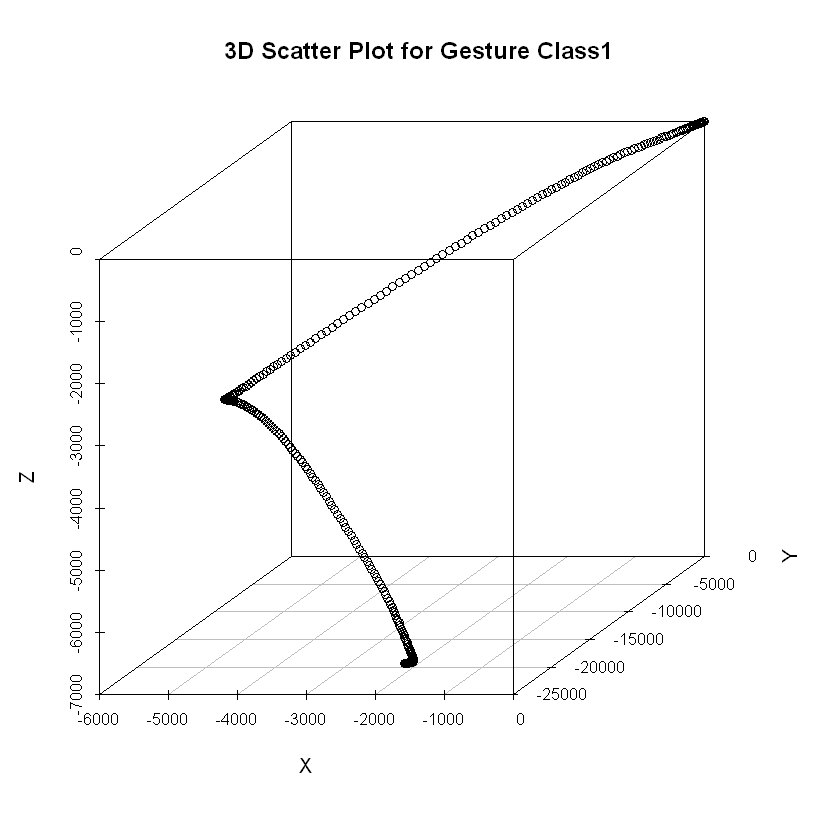

In [38]:

t_class1_x=as.data.frame(t(class1_x[,]))
velocity_class1_x=cumsum(t_class1_x)
loc_class1_x=cumsum(velocity_class1_x)

t_class1_y=as.data.frame(t(class1_y[,]))
velocity_class1_y=cumsum(t_class1_y)
loc_class1_y=cumsum(velocity_class1_y)

t_class1_z=as.data.frame(t(class1_z[,]))
velocity_class1_z=cumsum(t_class1_z)
loc_class1_z=cumsum(velocity_class1_z)

scatterplot3d(  x=loc_class1_x[,1], y=loc_class1_y[,1], z=loc_class1_z[,1], main="3D Scatter Plot for Gesture Class1",
                xlab = "X", ylab= "Y", zlab="Z")


3D PLOT for CLASS 2

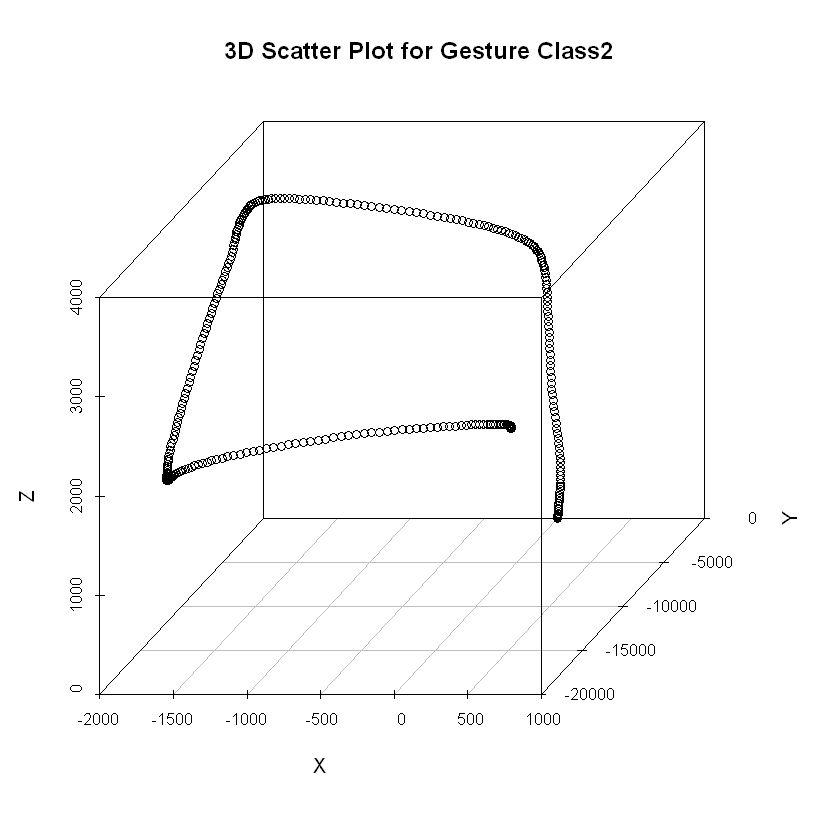

In [39]:


t_class2_x=as.data.frame(t(class2_x[,]))
velocity_class2_x=cumsum(t_class2_x)
loc_class2_x=cumsum(velocity_class2_x)

t_class2_y=as.data.frame(t(class2_y[,]))
velocity_class2_y=cumsum(t_class2_y)
loc_class2_y=cumsum(velocity_class2_y)

t_class2_z=as.data.frame(t(class2_z[,]))
velocity_class2_z=cumsum(t_class2_z)
loc_class2_z=cumsum(velocity_class2_z)

scatterplot3d(x=loc_class2_x[,2], y=loc_class2_y[,2], z=loc_class2_z[,2],main="3D Scatter Plot for Gesture Class2",
              xlab = "X", ylab= "Y", zlab="Z")

3D PLOT for CLASS 3

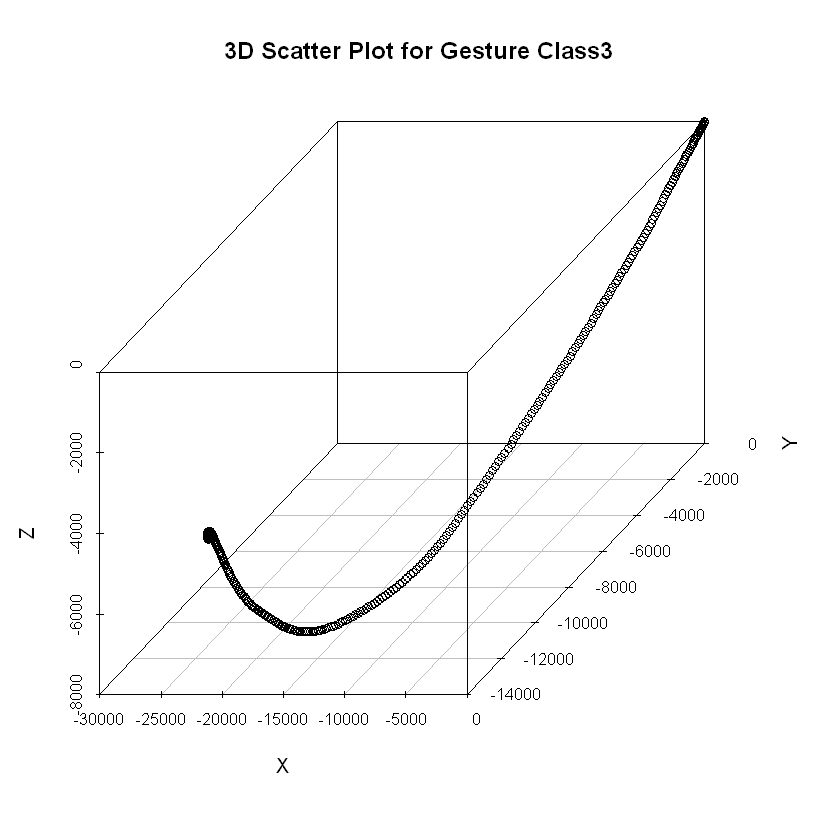

In [40]:


t_class3_x=as.data.frame(t(class3_x[,]))
velocity_class3_x=cumsum(t_class3_x)
loc_class3_x=cumsum(velocity_class3_x)

t_class3_y=as.data.frame(t(class3_y[,]))
velocity_class3_y=cumsum(t_class3_y)
loc_class3_y=cumsum(velocity_class3_y)

t_class3_z=as.data.frame(t(class3_z[,]))
velocity_class3_z=cumsum(t_class3_z)
loc_class3_z=cumsum(velocity_class3_z)

scatterplot3d(x=loc_class3_x[,3], y=loc_class3_y[,3], z=loc_class3_z[,3],main="3D Scatter Plot for Gesture Class3",
              xlab = "X", ylab= "Y", zlab="Z")



3D PLOT for CLASS 4


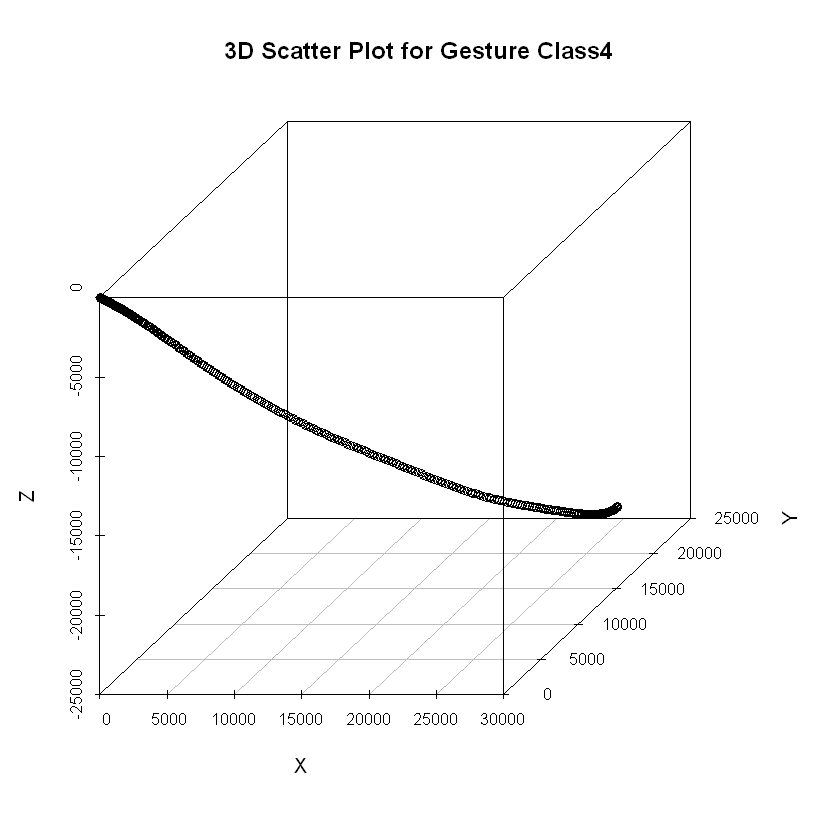

In [41]:

t_class4_x=as.data.frame(t(class4_x[,]))
velocity_class4_x=cumsum(t_class4_x)
loc_class4_x=cumsum(velocity_class4_x)

t_class4_y=as.data.frame(t(class4_y[,]))
velocity_class4_y=cumsum(t_class4_y)
loc_class4_y=cumsum(velocity_class4_y)

t_class4_z=as.data.frame(t(class4_z[,]))
velocity_class4_z=cumsum(t_class4_z)
loc_class4_z=cumsum(velocity_class4_z)

scatterplot3d(x=loc_class4_x[,3], y=loc_class4_y[,3], z=loc_class4_z[,3],main="3D Scatter Plot for Gesture Class4",
              xlab = "X", ylab= "Y", zlab="Z")




3D PLOT for CLASS 5

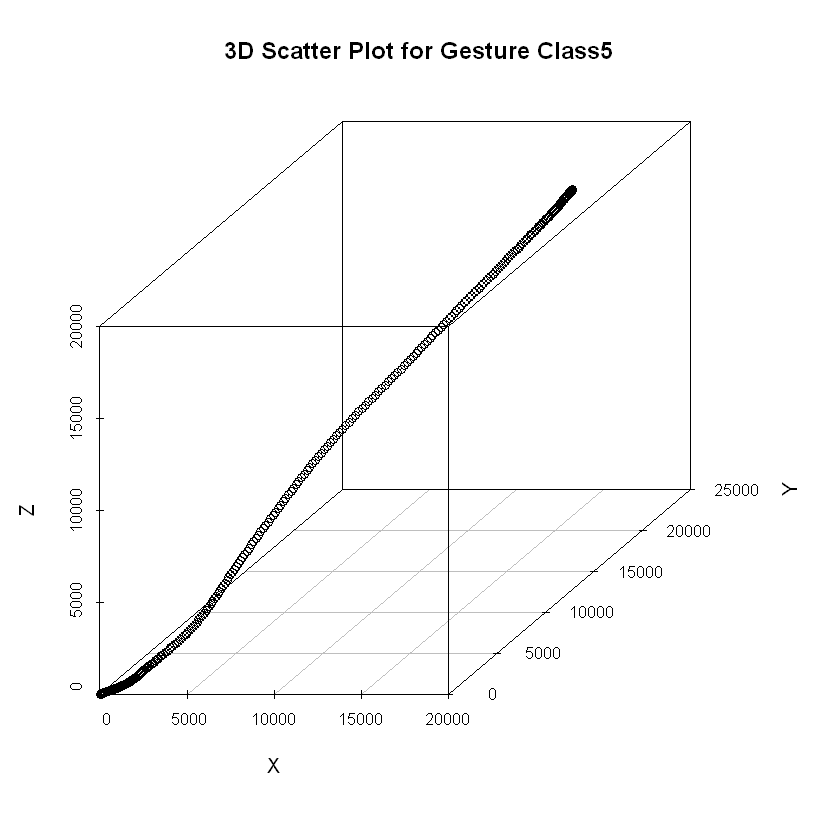

In [42]:


t_class5_x=as.data.frame(t(class5_x[,]))
velocity_class5_x=cumsum(t_class5_x)
loc_class5_x=cumsum(velocity_class5_x)

t_class5_y=as.data.frame(t(class5_y[,]))
velocity_class5_y=cumsum(t_class5_y)
loc_class5_y=cumsum(velocity_class5_y)

t_class5_z=as.data.frame(t(class5_z[,]))
velocity_class5_z=cumsum(t_class5_z)
loc_class5_z=cumsum(velocity_class5_z)

scatterplot3d(x=loc_class5_x[,14], y=loc_class5_y[,14], z=loc_class5_z[,14],main="3D Scatter Plot for Gesture Class5",
              xlab = "X", ylab= "Y", zlab="Z")


3D PLOT for CLASS 6

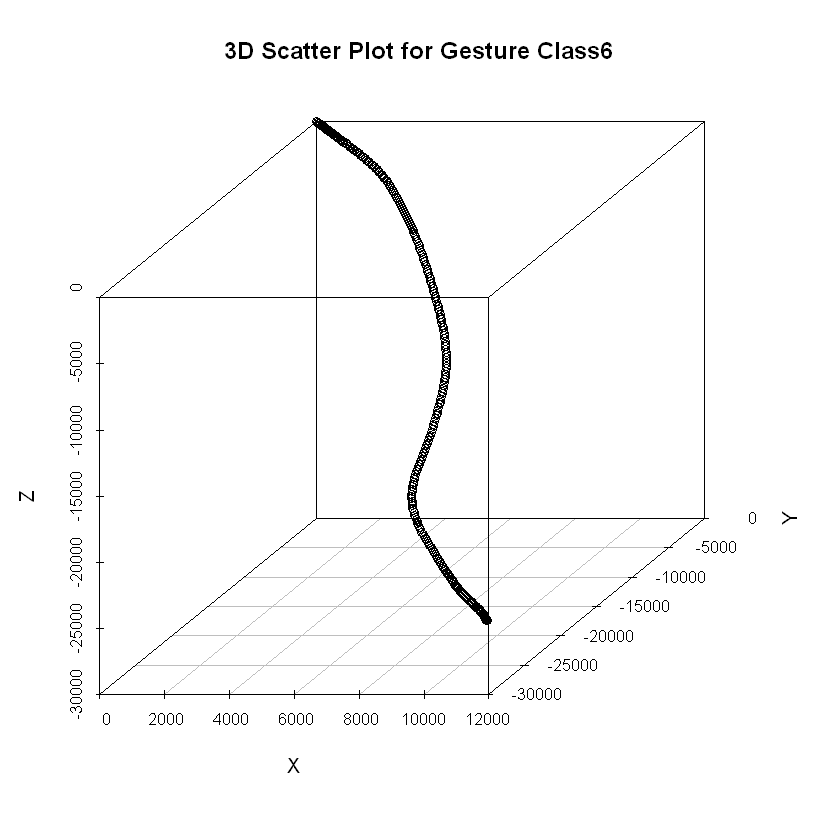

In [43]:

t_class6_x=as.data.frame(t(class6_x[,]))
velocity_class6_x=cumsum(t_class6_x)
loc_class6_x=cumsum(velocity_class6_x)

t_class6_y=as.data.frame(t(class6_y[,]))
velocity_class6_y=cumsum(t_class6_y)
loc_class6_y=cumsum(velocity_class6_y)

t_class6_z=as.data.frame(t(class6_z[,]))
velocity_class6_z=cumsum(t_class6_z)
loc_class6_z=cumsum(velocity_class6_z)

scatterplot3d(x=loc_class6_x[,6], y=loc_class6_y[,6], z=loc_class6_z[,6],main="3D Scatter Plot for Gesture Class6",
              xlab = "X", ylab= "Y", zlab="Z")



3D PLOT for CLASS 7


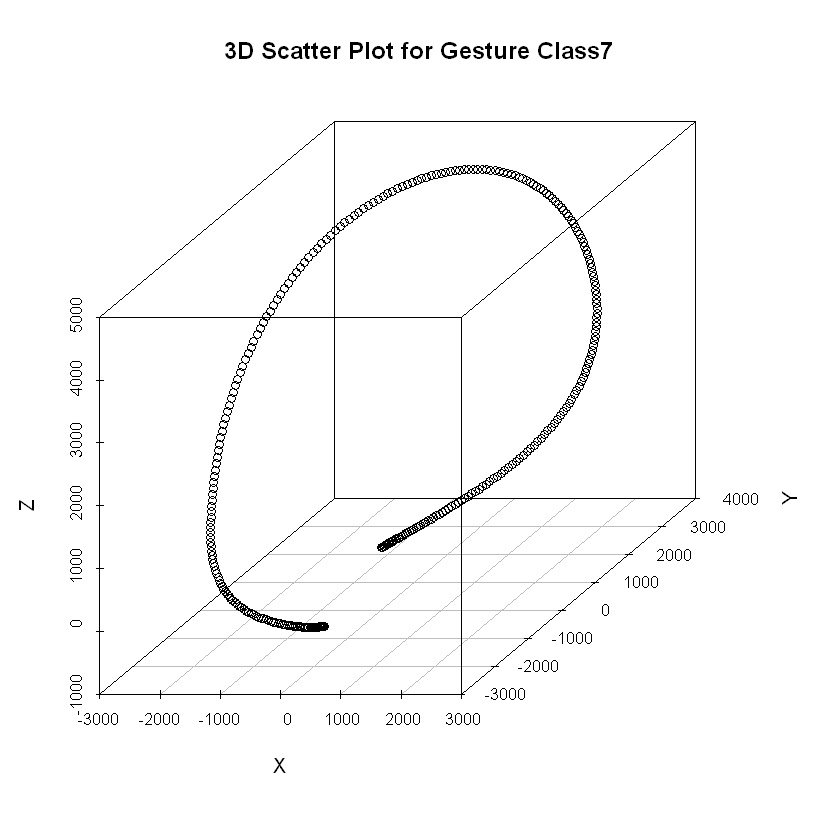

In [44]:


t_class7_x=as.data.frame(t(class7_x[,]))
velocity_class7_x=cumsum(t_class7_x)
loc_class7_x=cumsum(velocity_class7_x)

t_class7_y=as.data.frame(t(class7_y[,]))
velocity_class7_y=cumsum(t_class7_y)
loc_class7_y=cumsum(velocity_class7_y)

t_class7_z=as.data.frame(t(class7_z[,]))
velocity_class7_z=cumsum(t_class7_z)
loc_class7_z=cumsum(velocity_class7_z)

scatterplot3d(x=loc_class7_x[,7], y=loc_class7_y[,7], z=loc_class7_z[,7],main="3D Scatter Plot for Gesture Class7",
              xlab = "X", ylab= "Y", zlab="Z")

3D PLOT for CLASS 8

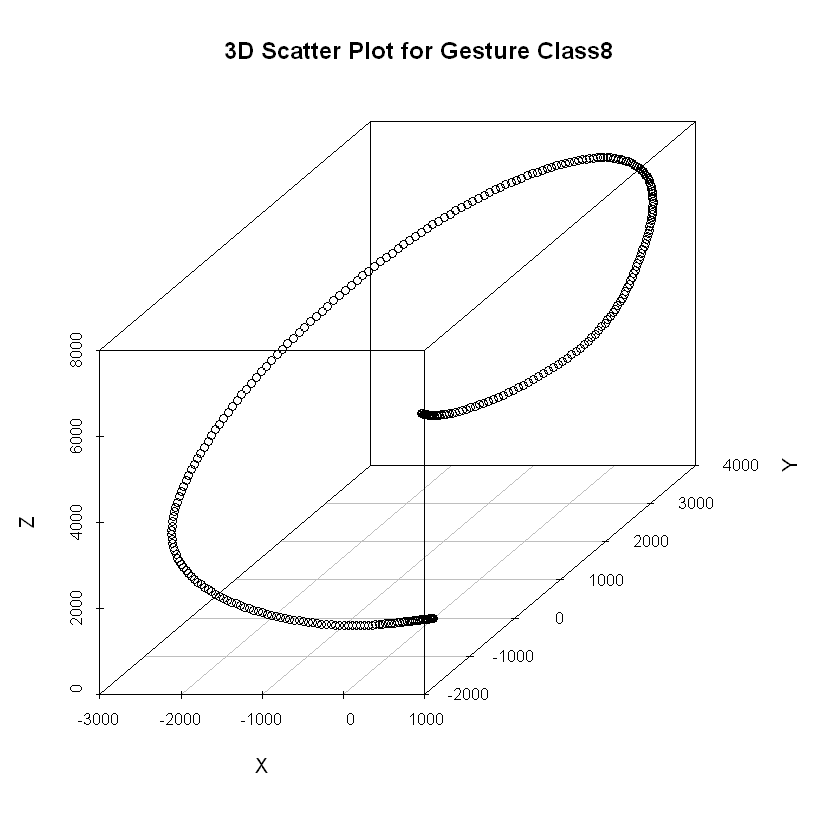

In [45]:


t_class8_x=as.data.frame(t(class8_x[,]))
velocity_class8_x=cumsum(t_class8_x)
loc_class8_x=cumsum(velocity_class8_x)

t_class8_y=as.data.frame(t(class8_y[,]))
velocity_class8_y=cumsum(t_class8_y)
loc_class8_y=cumsum(velocity_class8_y)

t_class8_z=as.data.frame(t(class8_z[,]))
velocity_class8_z=cumsum(t_class8_z)
loc_class8_z=cumsum(velocity_class8_z)

scatterplot3d(x=loc_class8_x[,8], y=loc_class8_y[,8], z=loc_class8_z[,8],main="3D Scatter Plot for Gesture Class8",
              xlab = "X", ylab= "Y", zlab="Z")


##### B

In [46]:
concatenated = cbind(x,y[,-1])
concatenated = cbind(concatenated, z[,-1])
ncol(concatenated)
nrow(concatenated)

[1] 946

[1] 896

In [47]:
ncol(x)
nrow(x)


[1] 316

[1] 896

In [48]:
colnames(concatenated)[1] = "class"
colnames(concatenated)[2:316] = paste("X.", 1:315)
colnames(concatenated)[317:631] = paste("Y.", 1:315)
colnames(concatenated)[632:946] = paste("Z.", 1:315)
head(concatenated)

class,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6,X. 7,X. 8,X. 9,...,Z. 306,Z. 307,Z. 308,Z. 309,Z. 310,Z. 311,Z. 312,Z. 313,Z. 314,Z. 315
6,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,0.5232168,0.5139944,0.50348075,0.49296714,0.47452222,0.4560773,0.4376324,0.4191875,0.4007426,0.3822976
5,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.4270104,-0.4270104,-0.42701043,-0.42717222,-0.42877307,-0.4407199,-0.4526667,-0.4646135,-0.4765603,-0.4885071
5,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.8627172,-0.8627172,-0.86271720,-0.86271720,-0.86271720,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172
3,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,-0.1873845,-0.1235489,-0.05587047,0.01180812,0.07948656,0.1570561,0.2537396,0.4455027,0.6485381,0.8515735
4,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,1.8674725,1.8343190,1.75599960,1.63858220,1.52116390,1.4532661,1.5152189,1.6326367,1.7500543,1.8674725
8,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,...,0.6979770,0.6654623,0.63294758,0.60043289,0.55859021,0.5167475,0.4679755,0.4192035,0.3704314,0.3216594


Concatenated data has 896 rows, same as the original data and 946 columns which is three times of the original -2. Columns which include the class info are removed in merging to avoid repetition.

Concatenated series seperated according to gesture classes.

In [49]:

print("Class 1")
class1_merged = concatenated[concatenated$class==1,]
head(class1_merged)

print("Class 2")
class2_merged = concatenated[concatenated$class==2,]
head(class2_merged)

print("Class 3")
class3_merged = concatenated[concatenated$class==3,]
head(class3_merged)

print("Class 4")
class4_merged = concatenated[concatenated$class==4,]
head(class4_merged)

print("Class 5")
class5_merged = concatenated[concatenated$class==5,]
head(class5_merged)

print("Class 6")
class6_merged = concatenated[concatenated$class==6,]
head(class6_merged)

print("Class 7")
class7_merged = concatenated[concatenated$class==7,]
head(class7_merged)

print("Class 8")
class8_merged = concatenated[concatenated$class==8,]
head(class8_merged)



[1] "Class 1"


,class,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6,X. 7,X. 8,X. 9,...,Z. 306,Z. 307,Z. 308,Z. 309,Z. 310,Z. 311,Z. 312,Z. 313,Z. 314,Z. 315
11,1,-0.7914472,-0.7914472,-0.7958727,-0.8100650,-0.8492300,-0.9034648,-0.9311463,-0.9506034,-0.9506034,...,-0.007064043,0.005635896,0.005635896,0.005635896,0.005635896,0.005635896,0.005635896,0.005635896,0.0056358959,0.005635896
17,1,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,...,0.818898610,0.836255730,0.843713110,0.843713110,0.865129740,0.894523900,0.928200950,0.961877850,0.9955547400,1.029231600
19,1,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,...,0.251094240,0.272352210,0.285509200,0.298452750,0.310528340,0.321015040,0.321015040,0.321015040,0.3210150400,0.321015040
23,1,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,...,0.046817682,0.046817682,0.046817682,0.046142200,0.042719759,0.038071443,0.025332352,0.012593260,-0.0001458324,-0.012884924
38,1,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,...,0.684985310,0.678932910,0.657091280,0.610350060,0.563609010,0.516867900,0.470126680,0.423385450,0.3766442300,0.329903000
43,1,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,...,-0.123477210,-0.159502030,-0.210131480,-0.273817140,-0.326935460,-0.364647520,-0.396490350,-0.428333180,-0.4601760300,-0.492018850


[1] "Class 2"


,class,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6,X. 7,X. 8,X. 9,...,Z. 306,Z. 307,Z. 308,Z. 309,Z. 310,Z. 311,Z. 312,Z. 313,Z. 314,Z. 315
15,2,1.19950680,1.19950680,1.23321680,1.32567850,1.36320540,1.37872270,1.37872270,1.37872270,1.37872270,...,0.39302234,0.411643600,0.44706026,0.47759962,0.50401204,0.51192826,0.52345869,0.54987111,0.51449197,0.44365866
20,2,0.13857648,0.13857648,0.13857648,0.13857648,0.13857648,0.13857648,0.13857648,0.13857648,0.13857648,...,0.20609883,0.251320830,0.27704524,0.27704524,0.27704524,0.27231973,0.26113603,0.19526453,0.12641498,0.05756543
29,2,0.41283289,0.41283289,0.41283289,0.41283289,0.41283289,0.41283289,0.41283289,0.41283289,0.41283289,...,-0.42765054,-0.373308000,-0.32561268,-0.28839176,-0.24391933,-0.19329889,-0.14836229,-0.10593044,-0.08367671,-0.06506625
31,2,0.02397005,0.02397005,0.02397005,0.02397005,0.02397005,0.02397005,0.02397005,0.02397005,0.02397005,...,-0.01686152,0.021545678,0.06700107,0.06700107,0.06700107,0.06700107,0.06700107,0.06624871,0.03881089,-0.02241021
58,2,-1.19775460,-1.19775460,-1.19775460,-1.19775460,-1.19775460,-1.19775460,-1.19775460,-1.19775460,-1.19775460,...,-0.20536171,-0.197128160,-0.18805839,-0.17109814,-0.15043923,-0.13115257,-0.11351691,-0.09988367,-0.09988367,-0.09988367
60,2,0.14714955,0.14714955,0.14714955,0.14714955,0.14714955,0.14714955,0.14714955,0.14714955,0.14714955,...,-0.01319969,-0.004149423,0.01803511,0.04168922,0.04347443,0.04347443,0.04347443,0.04347443,0.04347443,0.04347443


[1] "Class 3"


,class,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6,X. 7,X. 8,X. 9,...,Z. 306,Z. 307,Z. 308,Z. 309,Z. 310,Z. 311,Z. 312,Z. 313,Z. 314,Z. 315
4,3,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,-0.1873845,-0.1235489,-0.05587047,0.01180812,0.07948656,0.15705611,0.25373962,0.44550270,0.6485381,0.8515735
13,3,-0.595755260,-0.595755260,-0.595755260,-0.595755260,-0.595755260,-0.595755260,-0.595755260,-0.595755260,-0.595755260,...,-0.6842806,-0.6672279,-0.65017523,-0.63312253,-0.61606982,-0.59901710,-0.58196441,-0.56491171,-0.5478590,-0.5308063
27,3,-0.690376480,-0.690376480,-0.690376480,-0.690376480,-0.690376480,-0.690376480,-0.690376480,-0.690376480,-0.690376480,...,1.9056851,1.8265186,1.63560930,1.40420240,1.17279420,0.84194190,0.44812322,-0.01469252,-0.4775081,-0.9403235
61,3,-1.045878600,-1.045878600,-1.045878600,-1.045878600,-1.045878600,-1.045878600,-1.045878600,-1.045878600,-1.045878600,...,-0.5958582,-0.5673330,-0.53880783,-0.51028265,-0.48175749,-0.45323232,-0.42470714,-0.39618196,-0.3676568,-0.3391316
80,3,-1.235182400,-1.235182400,-1.235182400,-1.235182400,-1.235182400,-1.235182400,-1.235182400,-1.235182400,-1.235182400,...,-1.7993148,-1.7993148,-1.79931480,-1.79931480,-1.74581750,-1.69020840,-1.62281650,-1.55511850,-1.4874204,-1.4197224
94,3,-0.710342920,-0.710342920,-0.710342920,-0.710342920,-0.710342920,-0.710342920,-0.710342920,-0.710342920,-0.710342920,...,0.2955061,0.2398954,0.18428496,0.12867449,0.07306408,0.01745367,-0.03815674,-0.09376715,-0.1493776,-0.2049880


[1] "Class 4"


,class,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6,X. 7,X. 8,X. 9,...,Z. 306,Z. 307,Z. 308,Z. 309,Z. 310,Z. 311,Z. 312,Z. 313,Z. 314,Z. 315
5,4,1.2861978,1.2861978,1.2861978,1.2861978,1.2861978,1.2861978,1.2861978,1.2861978,1.2861978,...,1.86747250,1.83431900,1.7559996,1.6385822,1.5211639,1.4532661,1.5152189,1.6326367,1.7500543,1.8674725
8,4,0.3053030,0.3053030,0.3053030,0.3053030,0.3053030,0.3053030,0.3053030,0.3053030,0.3053030,...,-0.21185537,-0.21185537,-0.2118554,-0.2118554,-0.2118554,-0.2279433,-0.2660181,-0.3198493,-0.3745386,-0.4292279
9,4,0.9808104,0.9808104,0.9808104,0.9808104,0.9808104,0.9808104,0.9808104,0.9808104,0.9808104,...,-0.17731429,-0.40059206,-0.5971268,-0.7515210,-0.8827771,-0.9944160,-1.1060549,-1.2176937,-1.3293326,-1.4409715
34,4,0.5423735,0.5423735,0.5423735,0.5423735,0.5423735,0.5423735,0.5423735,0.5423735,0.5423735,...,0.07125916,0.07125916,0.1204207,0.2027371,0.2974457,0.3921549,0.4166406,0.4211246,0.4211246,0.4211246
51,4,1.1845220,1.1845220,1.1845220,1.1845220,1.1845220,1.1845220,1.1845220,1.1845220,1.1845220,...,1.37383130,1.37383130,1.3689742,1.3638581,1.3467889,1.3292479,1.3117068,1.2941658,1.2766247,1.2590837
52,4,1.2051478,1.2051478,1.2051478,1.2051478,1.2051478,1.2051478,1.2051478,1.2051478,1.2051478,...,0.18831495,0.05219672,-0.0839215,-0.2200397,-0.3108263,-0.3631794,-0.3791933,-0.3791933,-0.3791933,-0.3791933


[1] "Class 5"


,class,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6,X. 7,X. 8,X. 9,...,Z. 306,Z. 307,Z. 308,Z. 309,Z. 310,Z. 311,Z. 312,Z. 313,Z. 314,Z. 315
2,5,1.6273111,1.6273111,1.6273111,1.6273111,1.6273111,1.6273111,1.6273111,1.6273111,1.6273111,...,-0.4270104,-0.4270104,-0.4270104,-0.4271722,-0.4287731,-0.4407199,-0.4526667,-0.4646135,-0.4765603,-0.4885071
3,5,0.6612765,0.6612765,0.6612765,0.6612765,0.6612765,0.6612765,0.6612765,0.6612765,0.6612765,...,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172
14,5,-0.1727133,-0.1727133,-0.1727133,-0.1727133,-0.1727133,-0.1727133,-0.1727133,-0.1727133,-0.1727133,...,-1.1384779,-1.1384779,-1.1384779,-1.1384779,-1.1384779,-1.1384779,-1.1384779,-1.1384779,-1.1384779,-1.1384779
35,5,-0.1050939,-0.1050939,-0.1050939,-0.1050939,-0.1050939,-0.1050939,-0.1050939,-0.1050939,-0.1050939,...,-1.0213441,-1.0028628,-0.9843814,-0.9659001,-0.9474188,-0.9289375,-0.9104561,-0.8919748,-0.8734935,-0.8550122
41,5,-0.0802111,-0.0802111,-0.0802111,-0.0802111,-0.0802111,-0.0802111,-0.0802111,-0.0802111,-0.0802111,...,-1.4048882,-1.4170469,-1.4398209,-1.4625948,-1.4853688,-1.5206110,-1.5633136,-1.6088616,-1.6544096,-1.6999575
45,5,1.4915011,1.4915011,1.4915011,1.4915011,1.4915011,1.4915011,1.4915011,1.4915011,1.4915011,...,-0.4033390,-0.4088668,-0.4117623,-0.4117623,-0.4127212,-0.4143006,-0.4211258,-0.4298123,-0.4384989,-0.4471854


[1] "Class 6"


,class,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6,X. 7,X. 8,X. 9,...,Z. 306,Z. 307,Z. 308,Z. 309,Z. 310,Z. 311,Z. 312,Z. 313,Z. 314,Z. 315
1,6,-0.3042432,-0.3042432,-0.3042432,-0.3042432,-0.3042432,-0.3042432,-0.3042432,-0.3042432,-0.3042432,...,0.5232168,0.5139944,0.5034808,0.4929671,0.4745222,0.4560773,0.4376324,0.4191875,0.4007426,0.3822976
10,6,-1.1770783,-1.1770783,-1.1770783,-1.1770783,-1.1770783,-1.1770783,-1.1770783,-1.1770783,-1.1770783,...,1.1650016,1.1575770,1.1501524,1.1427279,1.1551440,1.1683433,1.1831507,1.1979999,1.2128491,1.2276983
16,6,0.8205179,0.8205179,0.8205179,0.8205179,0.8205179,0.8205179,0.8205179,0.8205179,0.8205179,...,0.6878951,0.6661622,0.6445714,0.6298057,0.6182392,0.6066727,0.5951063,0.5835399,0.5719734,0.5604069
18,6,-0.1356258,-0.1356258,-0.1356258,-0.1356258,-0.1356258,-0.1356258,-0.1356258,-0.1356258,-0.1356258,...,1.8531219,1.8531219,1.8531219,1.8531219,1.8531219,1.8641096,1.8784728,1.8988637,1.9192546,1.9396455
22,6,1.5880751,1.5880751,1.5880751,1.5880751,1.5880751,1.5880751,1.5880751,1.5880751,1.5880751,...,0.2866658,0.3007707,0.3148757,0.3289806,0.3481590,0.3722054,0.4004153,0.4286251,0.4568350,0.4850449
28,6,1.1972450,1.1972450,1.1972450,1.1972450,1.1972450,1.1972450,1.1972450,1.1972450,1.1972450,...,0.9865509,0.9438758,0.9012007,0.8581629,0.8133613,0.7600174,0.7066736,0.6533298,0.5999859,0.5466421


[1] "Class 7"


,class,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6,X. 7,X. 8,X. 9,...,Z. 306,Z. 307,Z. 308,Z. 309,Z. 310,Z. 311,Z. 312,Z. 313,Z. 314,Z. 315
7,7,1.47432770,1.47432770,1.47432770,1.47432770,1.47432770,1.47432770,1.47432770,1.47432770,1.47432770,...,-0.13044967,-0.13044967,-0.13559061,-0.14638657,-0.15902244,-0.17284884,-0.15298409,-0.12116443,-0.06794675,-0.01150472
12,7,0.03709836,0.03709836,0.03709836,0.03709836,0.03709836,0.03709836,0.03709836,0.03709836,0.03709836,...,0.77632133,0.75338702,0.73045271,0.70751840,0.68458409,0.66579070,0.65432354,0.64285639,0.63138923,0.61992208
24,7,0.51106109,0.51106109,0.51106109,0.51106109,0.51106109,0.51106109,0.51106109,0.51106109,0.51106109,...,-0.13038094,-0.10221973,-0.08306382,-0.06491550,-0.05486720,-0.04548013,-0.04292772,-0.04073740,-0.04068230,-0.04068230
26,7,-0.74327299,-0.74327299,-0.74327299,-0.74327299,-0.74327299,-0.74327299,-0.74327299,-0.74327299,-0.74327299,...,-0.05925499,-0.05055421,-0.04258179,-0.03498704,-0.02865478,-0.03300517,-0.03735556,-0.04170596,-0.04605635,-0.05040674
32,7,1.07416080,1.07416080,1.07416080,1.07416080,1.07416080,1.07416080,1.07416080,1.07416080,1.07416080,...,1.13336550,1.10776320,1.07359740,1.03630240,1.00102300,0.97604006,0.95141252,0.94094005,0.94094005,0.94094005
39,7,1.44445650,1.44445650,1.44445650,1.44445650,1.44445650,1.44445650,1.44445650,1.44445650,1.44445650,...,-0.34381199,-0.34381199,-0.34381199,-0.34381199,-0.34381199,-0.34056805,-0.33467776,-0.32629212,-0.31133983,-0.29638754


[1] "Class 8"


,class,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6,X. 7,X. 8,X. 9,...,Z. 306,Z. 307,Z. 308,Z. 309,Z. 310,Z. 311,Z. 312,Z. 313,Z. 314,Z. 315
6,8,-0.4792525,-0.4792525,-0.4792525,-0.4792525,-0.4792525,-0.4792525,-0.4792525,-0.4792525,-0.4792525,...,0.6979770,0.66546227,0.63294758,0.60043289,0.558590210,0.516747530,0.46797550,0.41920347,0.37043143,0.32165940
21,8,-0.5005661,-0.5005661,-0.5005661,-0.5005661,-0.5005661,-0.5005661,-0.5005661,-0.5005661,-0.5005661,...,-0.3545246,-0.33719984,-0.31987507,-0.30255030,-0.285225530,-0.267900760,-0.25166683,-0.24435795,-0.24110151,-0.24110151
25,8,-0.6343623,-0.6343623,-0.6343623,-0.6343623,-0.6343623,-0.6343623,-0.6343623,-0.6343623,-0.6343623,...,0.6450800,0.60375521,0.56790978,0.53390757,0.494389610,0.449345500,0.40235448,0.35039412,0.29372378,0.23705337
33,8,1.0491965,1.0621332,1.0750698,1.0854786,1.0958874,1.0958874,1.0958874,1.0958874,1.0958874,...,0.4833422,0.45381116,0.42428008,0.39474900,0.365217960,0.335686930,0.30615589,0.27662485,0.24709382,0.21756278
37,8,-0.2023839,-0.2023839,-0.2023839,-0.2023839,-0.2023839,-0.2023839,-0.2023839,-0.2023839,-0.2023839,...,-0.1386918,-0.09789459,-0.05709735,-0.01630011,0.024497135,0.065294378,0.09894947,0.12945717,0.15140186,0.17180045
40,8,-0.2174123,-0.2174123,-0.2174123,-0.2174123,-0.2174123,-0.2174123,-0.2496209,-0.2900378,-0.3486763,...,0.0583433,0.05107580,0.03675693,0.02243809,0.008119271,-0.006199607,-0.01671169,-0.02091538,-0.02222621,-0.02222621


CLASS 1 PCA

In [50]:
pca_class1 = prcomp(class1_merged[,-1])
summary(pca_class1)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     9.9396 8.4482 6.59510 6.44912 5.59215 5.43713 5.04694
Proportion of Variance 0.2068 0.1494 0.09104 0.08705 0.06545 0.06187 0.05331
Cumulative Proportion  0.2068 0.3562 0.44719 0.53424 0.59970 0.66157 0.71488
                           PC8     PC9    PC10   PC11    PC12   PC13    PC14
Standard deviation     4.05185 3.84269 3.22692 3.1141 2.86283 2.7388 2.67443
Proportion of Variance 0.03436 0.03091 0.02179 0.0203 0.01715 0.0157 0.01497
Cumulative Proportion  0.74924 0.78015 0.80194 0.8222 0.83939 0.8551 0.87006
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     2.52824 2.34748 2.20438 2.13478 2.09810 1.96515 1.80385
Proportion of Variance 0.01338 0.01153 0.01017 0.00954 0.00921 0.00808 0.00681
Cumulative Proportion  0.88344 0.89498 0.90515 0.91468 0.92390 0.93198 0.93879
                          PC22    PC23    

Cumulative proportion of variance covered by first two components is 0.3562 it is 35% of the total variance. Corresponding eigenvectors are:

,PC1,PC2,time_index
X. 1,0.04709332,0.02868884,1
X. 2,0.04691754,0.02891936,2
X. 3,0.04674469,0.02914645,3
X. 4,0.04661892,0.02937994,4
X. 5,0.04655458,0.02953212,5
X. 6,0.04655371,0.02959989,6


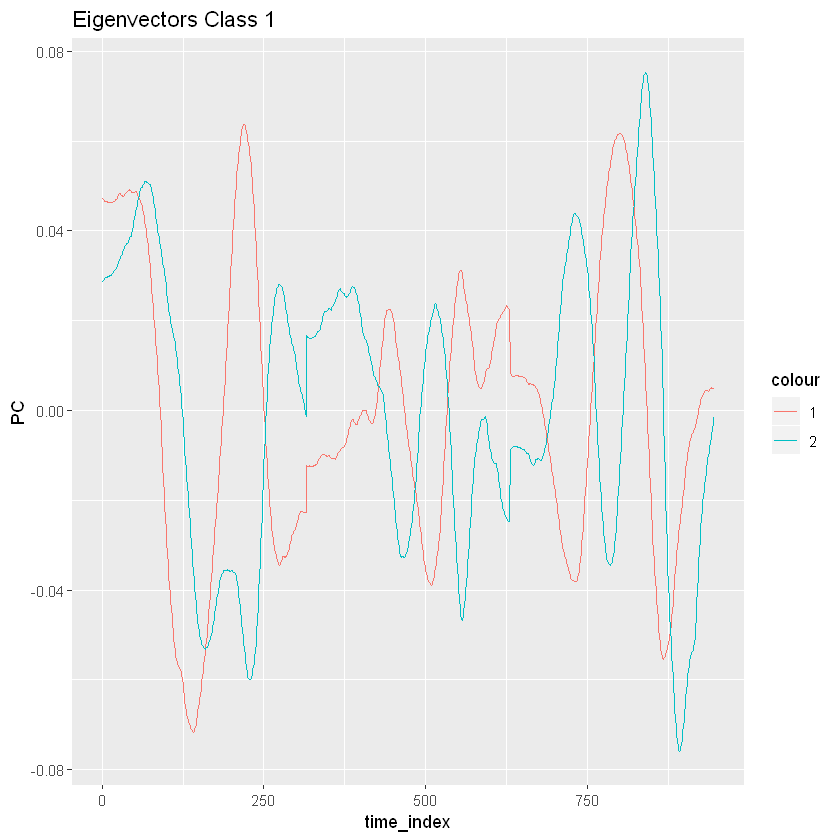

In [51]:
eigenvector_class1=as.data.frame(pca_class1$rotation[,c("PC1", "PC2")])
eigenvector_class1$time_index = 1:nrow(eigenvector_class1)
head(eigenvector_class1)
(ggplot(data=eigenvector_class1)+geom_line(aes(y=PC1, x=time_index, col="1"))
+geom_line(aes(y=PC2, x=time_index, col="2"))+labs(title="Eigenvectors Class 1",y="PC"))


CLASS 2 PCA

In [52]:
pca_class2 = prcomp(class2_merged[,-1])
summary(pca_class2)

Importance of components:
                           PC1    PC2     PC3     PC4    PC5     PC6     PC7
Standard deviation     12.4529 7.7830 5.44559 5.08124 4.7867 4.48948 3.96133
Proportion of Variance  0.3195 0.1248 0.06109 0.05319 0.0472 0.04152 0.03233
Cumulative Proportion   0.3195 0.4442 0.50532 0.55851 0.6057 0.64723 0.67956
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     3.54678 3.46057 3.43516 3.20426 3.12028 2.76717 2.61845
Proportion of Variance 0.02591 0.02467 0.02431 0.02115 0.02006 0.01577 0.01412
Cumulative Proportion  0.70547 0.73014 0.75445 0.77560 0.79566 0.81143 0.82555
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     2.55359 2.34923 2.22618 2.13102 2.02492 2.01220 1.95332
Proportion of Variance 0.01343 0.01137 0.01021 0.00935 0.00845 0.00834 0.00786
Cumulative Proportion  0.83899 0.85035 0.86056 0.86992 0.87837 0.88671 0.89457
                          PC22   P

Cumulative proportion of variance covered by first two components is 0.4442  it is 44% of the total variance. Corresponding eigenvectors are:

,PC1,PC2,time_index
X. 1,-0.007152723,0.007735187,1
X. 2,-0.007073918,0.007566753,2
X. 3,-0.007063139,0.007452007,3
X. 4,-0.007059294,0.007417343,4
X. 5,-0.007014954,0.007454612,5
X. 6,-0.006981731,0.007519956,6


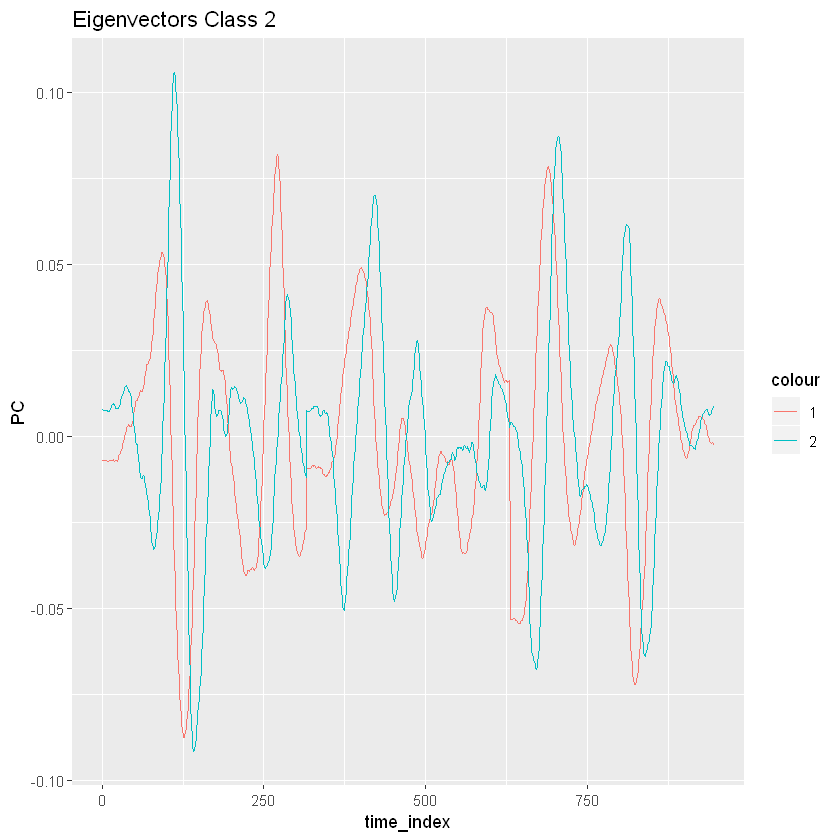

In [53]:
eigenvector_class2=as.data.frame(pca_class2$rotation[,c("PC1", "PC2")])
eigenvector_class2$time_index = 1:nrow(eigenvector_class2)
head(eigenvector_class2)
(ggplot(data=eigenvector_class2)+geom_line(aes(y=PC1, x=time_index, col="1"))
+geom_line(aes(y=PC2, x=time_index, col="2"))+labs(title="Eigenvectors Class 2",y="PC"))


CLASS 3 PCA

In [54]:
pca_class3 = prcomp(class3_merged[,-1])
summary(pca_class3)

Importance of components:
                           PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     13.2445 8.1332 7.7057 6.98970 6.50300 5.81724 4.68748
Proportion of Variance  0.2957 0.1115 0.1001 0.08235 0.07128 0.05704 0.03704
Cumulative Proportion   0.2957 0.4072 0.5073 0.58964 0.66092 0.71797 0.75500
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     4.04508 3.95601 3.42302 3.23537 2.82331 2.78038 2.64726
Proportion of Variance 0.02758 0.02638 0.01975 0.01764 0.01344 0.01303 0.01181
Cumulative Proportion  0.78259 0.80897 0.82872 0.84636 0.85980 0.87283 0.88464
                          PC15   PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     2.55717 2.3866 2.33164 2.19537 2.04489 1.96970 1.93485
Proportion of Variance 0.01102 0.0096 0.00916 0.00812 0.00705 0.00654 0.00631
Cumulative Proportion  0.89567 0.9053 0.91443 0.92255 0.92960 0.93614 0.94245
                          PC22    PC23

Cumulative proportion of variance covered by first two components is 0.4072  it is 40% of the total variance. Corresponding eigenvectors are:

,PC1,PC2,time_index
X. 1,0.03029609,-0.02604803,1
X. 2,0.03034764,-0.02600056,2
X. 3,0.03039920,-0.02595310,3
X. 4,0.03045076,-0.02590563,4
X. 5,0.03047880,-0.02587272,5
X. 6,0.03048026,-0.02585259,6


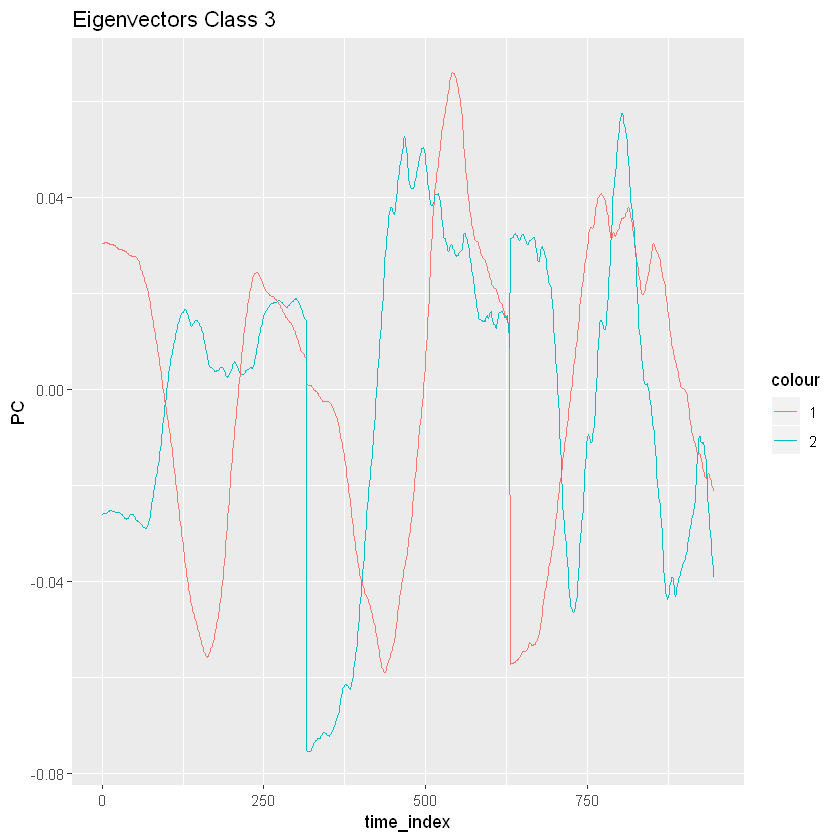

In [55]:
eigenvector_class3=as.data.frame(pca_class3$rotation[,c("PC1", "PC2")])
eigenvector_class3$time_index = 1:nrow(eigenvector_class3)
head(eigenvector_class3)
(ggplot(data=eigenvector_class3)+geom_line(aes(y=PC1, x=time_index, col="1"))
+geom_line(aes(y=PC2, x=time_index, col="2"))+labs(title="Eigenvectors Class 3",y="PC"))

CLASS 4 PCA

In [56]:
pca_class4 = prcomp(class4_merged[,-1])
summary(pca_class4)


Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     11.194 10.0544 7.49787 7.09489 6.45753 5.51131 5.12848
Proportion of Variance  0.215  0.1734 0.09645 0.08636 0.07154 0.05211 0.04512
Cumulative Proportion   0.215  0.3884 0.48487 0.57123 0.64278 0.69489 0.74001
                           PC8     PC9   PC10    PC11   PC12    PC13    PC14
Standard deviation     4.21282 3.85080 3.3451 3.29397 3.1104 3.02178 2.67064
Proportion of Variance 0.03045 0.02544 0.0192 0.01862 0.0166 0.01567 0.01224
Cumulative Proportion  0.77046 0.79590 0.8151 0.83372 0.8503 0.86598 0.87822
                          PC15   PC16    PC17   PC18    PC19   PC20    PC21
Standard deviation     2.49259 2.4502 2.31492 2.2650 2.14804 1.9902 1.93466
Proportion of Variance 0.01066 0.0103 0.00919 0.0088 0.00792 0.0068 0.00642
Cumulative Proportion  0.88888 0.8992 0.90837 0.9172 0.92509 0.9319 0.93830
                          PC22    PC23    PC24    

Cumulative proportion of variance covered by first two components is 0.3884   it is 38% of the total variance. Corresponding eigenvectors are:

,PC1,PC2,time_index
X. 1,-0.02886515,0.003564835,1
X. 2,-0.02886174,0.003532572,2
X. 3,-0.02885833,0.003500310,3
X. 4,-0.02876681,0.003488503,4
X. 5,-0.02866611,0.003492456,5
X. 6,-0.02865242,0.003512851,6


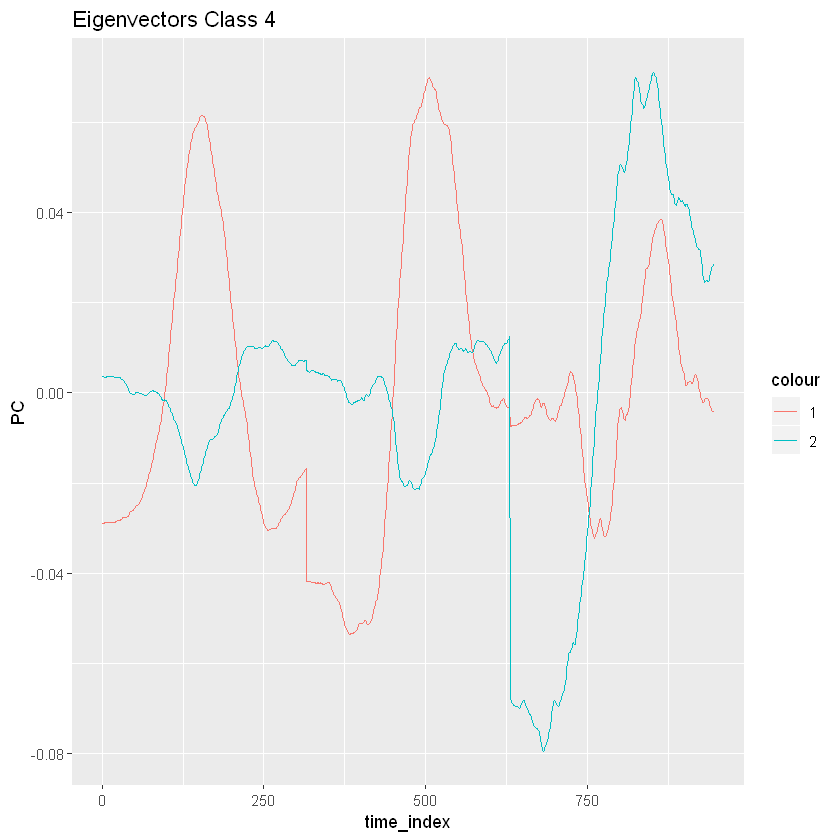

In [57]:
eigenvector_class4=as.data.frame(pca_class4$rotation[,c("PC1", "PC2")])
eigenvector_class4$time_index = 1:nrow(eigenvector_class4)
head(eigenvector_class4)
(ggplot(data=eigenvector_class4)+geom_line(aes(y=PC1, x=time_index, col="1"))
+geom_line(aes(y=PC2, x=time_index, col="2"))+labs(title="Eigenvectors Class 4",y="PC"))


CLASS 5 PCA

In [58]:
pca_class5 = prcomp(class5_merged[,-1])
(summary(pca_class5))


Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     11.0463 10.4901 5.96300 5.51262 4.83727 4.48353 3.91416
Proportion of Variance  0.2589  0.2335 0.07545 0.06449 0.04965 0.04266 0.03251
Cumulative Proportion   0.2589  0.4924 0.56790 0.63238 0.68203 0.72469 0.75720
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     3.40617 3.37463 3.16908 3.01415 2.89120 2.65940 2.56420
Proportion of Variance 0.02462 0.02417 0.02131 0.01928 0.01774 0.01501 0.01395
Cumulative Proportion  0.78182 0.80599 0.82730 0.84658 0.86432 0.87932 0.89328
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     2.46636 2.44881 2.20515 1.88769 1.79230 1.71550 1.63013
Proportion of Variance 0.01291 0.01272 0.01032 0.00756 0.00682 0.00624 0.00564
Cumulative Proportion  0.90618 0.91891 0.92923 0.93679 0.94361 0.94985 0.95549
                          

Cumulative proportion of variance covered by first two components is 0.4924    it is 49% of the total variance. Corresponding eigenvectors are:

,PC1,PC2,time_index
X. 1,-0.05884090,-0.04303713,1
X. 2,-0.05904195,-0.04307987,2
X. 3,-0.05924300,-0.04312260,3
X. 4,-0.05944980,-0.04316896,4
X. 5,-0.05969916,-0.04319061,5
X. 6,-0.05996505,-0.04320231,6


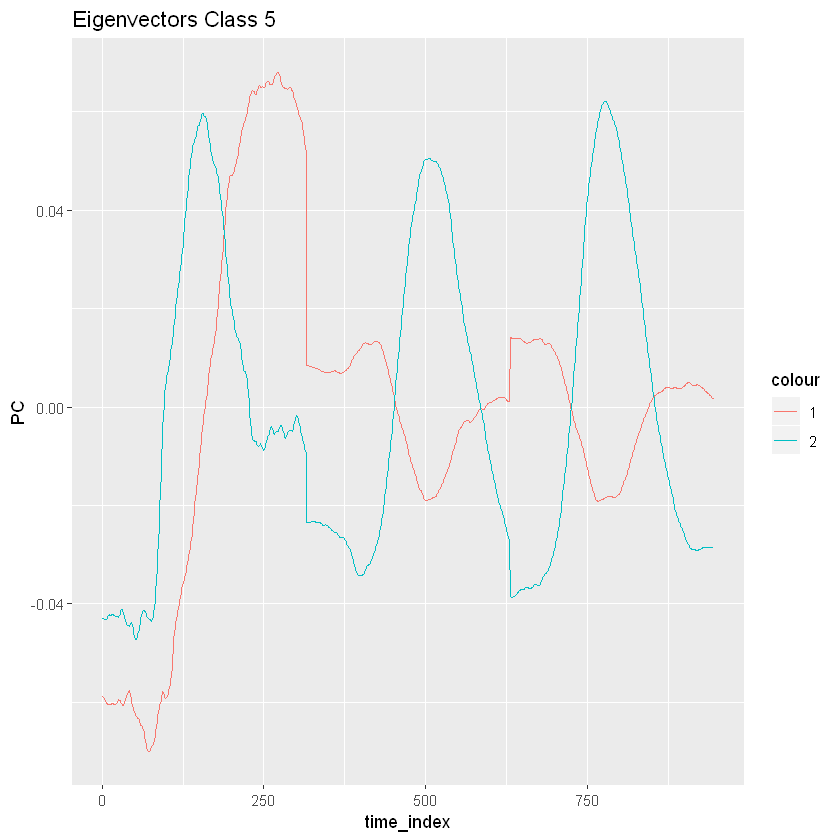

In [59]:
eigenvector_class5=as.data.frame(pca_class5$rotation[,c("PC1", "PC2")])
eigenvector_class5$time_index = 1:nrow(eigenvector_class5)
head(eigenvector_class5)
(ggplot(data=eigenvector_class5)+geom_line(aes(y=PC1, x=time_index, col="1"))
+geom_line(aes(y=PC2, x=time_index, col="2"))+labs(title="Eigenvectors Class 5",y="PC"))


CLASS 6 PCA

In [60]:
pca_class6 = prcomp(class6_merged[,-1])
summary(pca_class6)


Importance of components:
                           PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     13.8770 9.9409 8.9990 6.46662 6.15234 5.10049 5.01137
Proportion of Variance  0.2774 0.1423 0.1166 0.06023 0.05452 0.03747 0.03617
Cumulative Proportion   0.2774 0.4197 0.5364 0.59659 0.65111 0.68858 0.72475
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     4.90596 4.52755 3.86805 3.62642 3.42361 3.33189 3.02245
Proportion of Variance 0.03467 0.02953 0.02155 0.01894 0.01688 0.01599 0.01316
Cumulative Proportion  0.75942 0.78895 0.81050 0.82944 0.84632 0.86231 0.87547
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     2.97571 2.66929 2.48851 2.42418 2.34630 2.27363 2.1409
Proportion of Variance 0.01275 0.01026 0.00892 0.00846 0.00793 0.00745 0.0066
Cumulative Proportion  0.88823 0.89849 0.90741 0.91587 0.92380 0.93125 0.9378
                          PC22    PC23

Cumulative proportion of variance covered by first two components is 0.4197   it is 42% of the total variance. Corresponding eigenvectors are:

,PC1,PC2,time_index
X. 1,0.01420461,-0.07085935,1
X. 2,0.01407366,-0.07059341,2
X. 3,0.01394271,-0.07032747,3
X. 4,0.01381575,-0.07009104,4
X. 5,0.01374010,-0.06995526,5
X. 6,0.01367139,-0.06989576,6


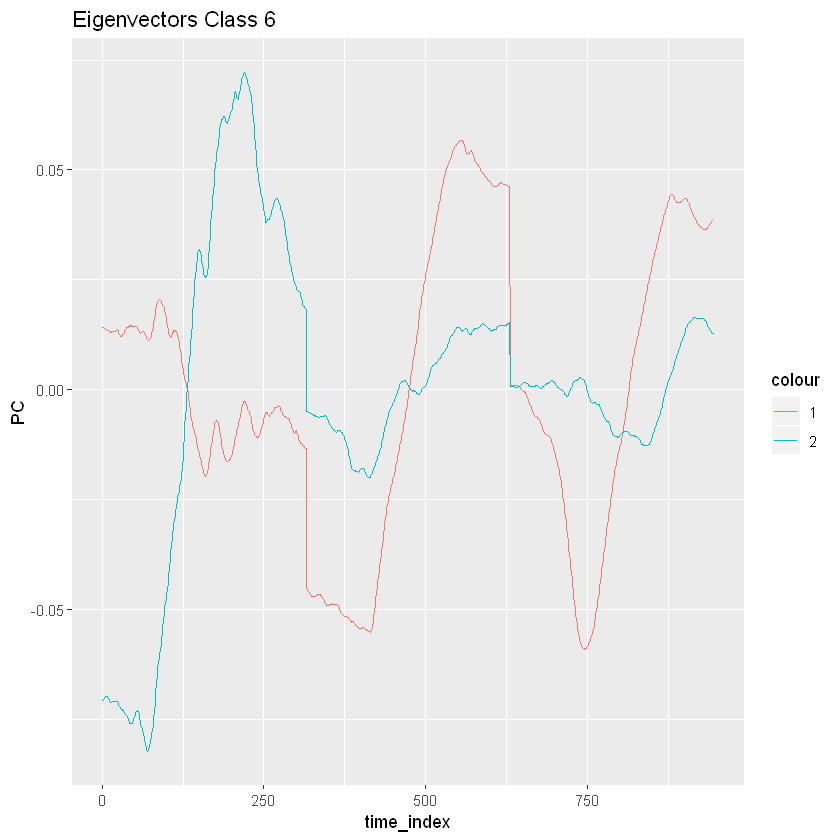

In [61]:
eigenvector_class6=as.data.frame(pca_class6$rotation[,c("PC1", "PC2")])
eigenvector_class6$time_index = 1:nrow(eigenvector_class6)
head(eigenvector_class6)
(ggplot(data=eigenvector_class6)+geom_line(aes(y=PC1, x=time_index, col="1"))
+geom_line(aes(y=PC2, x=time_index, col="2"))+labs(title="Eigenvectors Class 6",y="PC"))


CLASS 7 PCA

In [62]:
pca_class7 = prcomp(class7_merged[,-1])
summary(pca_class7)


Importance of components:
                           PC1    PC2    PC3     PC4     PC5     PC6    PC7
Standard deviation     12.6147 9.0280 7.9238 6.36744 5.14949 4.48786 3.7948
Proportion of Variance  0.3039 0.1557 0.1199 0.07743 0.05064 0.03846 0.0275
Cumulative Proportion   0.3039 0.4596 0.5795 0.65690 0.70754 0.74601 0.7735
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     3.67804 3.45704 3.1373 2.74699 2.50287 2.42100 2.23373
Proportion of Variance 0.02584 0.02282 0.0188 0.01441 0.01196 0.01119 0.00953
Cumulative Proportion  0.79934 0.82217 0.8410 0.85538 0.86734 0.87853 0.88806
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     2.15043 1.99386 1.90735 1.79350 1.73927 1.62441 1.60457
Proportion of Variance 0.00883 0.00759 0.00695 0.00614 0.00578 0.00504 0.00492
Cumulative Proportion  0.89689 0.90449 0.91143 0.91758 0.92335 0.92839 0.93331
                          PC22    PC23   P

Cumulative proportion of variance covered by first two components is 0.4596   it is 46% of the total variance. Corresponding eigenvectors are:

,PC1,PC2,time_index
X. 1,0.01847786,0.04820285,1
X. 2,0.01844084,0.04839650,2
X. 3,0.01844094,0.04859758,3
X. 4,0.01849810,0.04878539,4
X. 5,0.01859412,0.04900864,5
X. 6,0.01862625,0.04907861,6


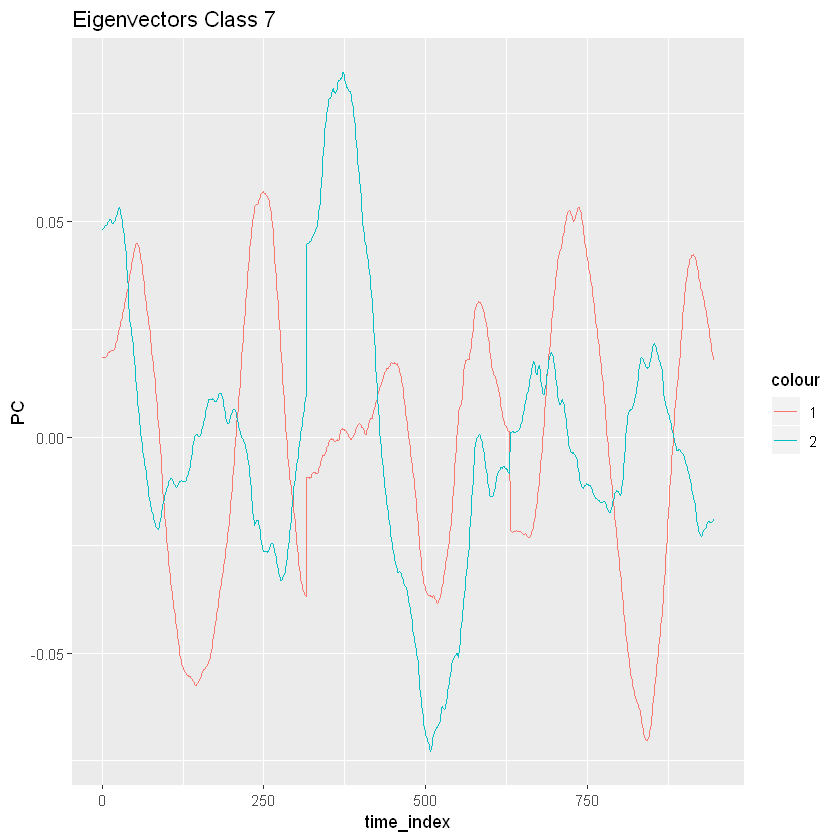

In [63]:
eigenvector_class7=as.data.frame(pca_class7$rotation[,c("PC1", "PC2")])
eigenvector_class7$time_index = 1:nrow(eigenvector_class7)
head(eigenvector_class7)
(ggplot(data=eigenvector_class7)+geom_line(aes(y=PC1, x=time_index, col="1"))
+geom_line(aes(y=PC2, x=time_index, col="2"))+labs(title="Eigenvectors Class 7",y="PC"))



CLASS 8 PCA

In [64]:
pca_class8 = prcomp(class8_merged[,-1])
summary(pca_class8)


Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     16.0325 10.4778 6.78484 5.48571 4.40234 4.07352 4.0326
Proportion of Variance  0.4362  0.1863 0.07812 0.05107 0.03289 0.02816 0.0276
Cumulative Proportion   0.4362  0.6225 0.70062 0.75169 0.78458 0.81273 0.8403
                           PC8    PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     3.25066 3.1182 2.72106 2.50509 2.41710 2.26577 2.12663
Proportion of Variance 0.01793 0.0165 0.01256 0.01065 0.00991 0.00871 0.00767
Cumulative Proportion  0.85826 0.8748 0.88733 0.89798 0.90789 0.91660 0.92428
                          PC15   PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     1.95179 1.9114 1.84605 1.71106 1.64536 1.56656 1.48030
Proportion of Variance 0.00646 0.0062 0.00578 0.00497 0.00459 0.00416 0.00372
Cumulative Proportion  0.93074 0.9369 0.94273 0.94769 0.95229 0.95645 0.96017
                          PC22    PC23

Cumulative proportion of variance covered by first two components is 0.6225 it is 62% of the total variance. Corresponding eigenvectors are:

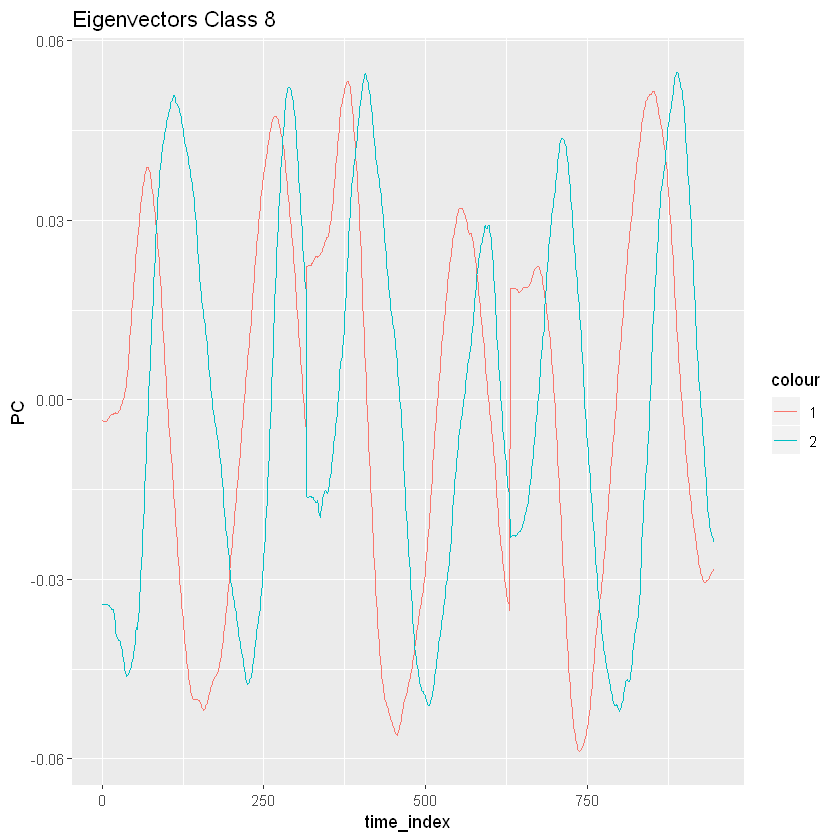

In [65]:
eigenvector_class8=as.data.frame(pca_class8$rotation[,c("PC1", "PC2")])
eigenvector_class8$time_index = 1:nrow(eigenvector_class8)
(ggplot(data=eigenvector_class8)+geom_line(aes(y=PC1, x=time_index, col="1"))
+geom_line(aes(y=PC2, x=time_index, col="2"))+labs(title="Eigenvectors Class 8" , y="PC"))


In [66]:
eigenvector_class1$class=1
eigenvector_class2$class=2
eigenvector_class3$class=3
eigenvector_class4$class=4
eigenvector_class5$class=5
eigenvector_class6$class=6
eigenvector_class7$class=7
eigenvector_class8$class=8

merged_eigenvectors = rbind(eigenvector_class1,eigenvector_class2,eigenvector_class3,eigenvector_class4, eigenvector_class5,
                           eigenvector_class6, eigenvector_class7,eigenvector_class8)


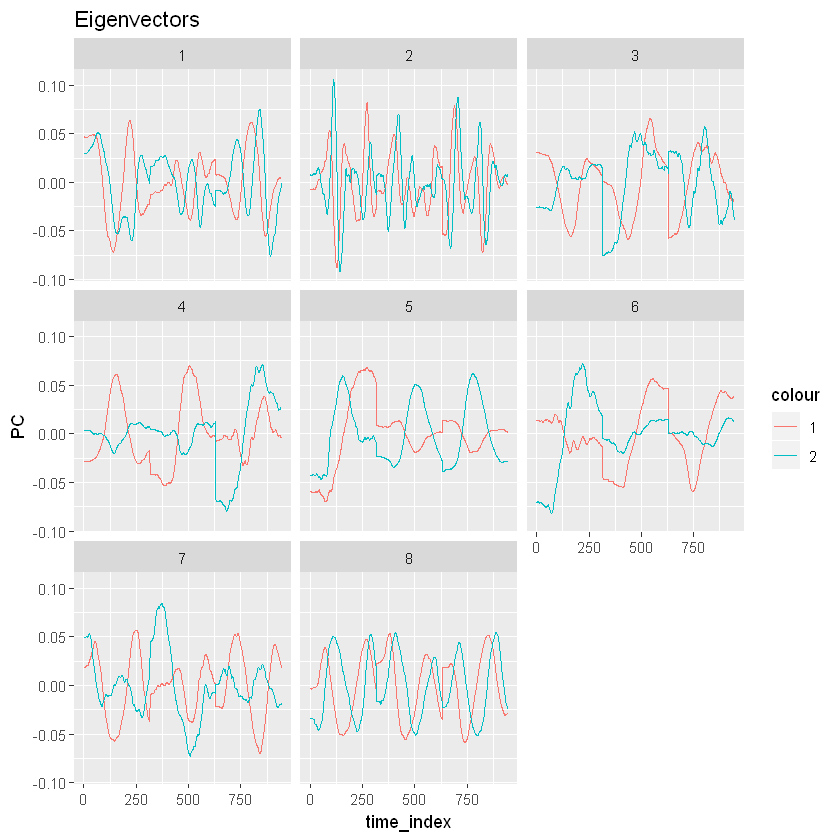

In [67]:
(ggplot(data=merged_eigenvectors)+geom_line(aes(y=PC1, x=time_index, col="1"))
+geom_line(aes(y=PC2, x=time_index, col="2"))+labs(title="Eigenvectors",y="PC")+facet_wrap(~class))

Eigenvectors show the directions of the variation. The time series plot can be used to differentiate classes. 

In this case each instance is represented with 315 x,y,z points which are used as features. Eigenvectors of component 1 and 2 helps to map these observations to 2D by reducing the features. Above plots can be interpreted as the somehow a representation of the behaviour of each gesture, since if the dot product of eigenvectors and gesture acceleration data is taken we will have a representation of that instance with two features.

The movements of  of the plots where the corresponding gesture is complex looks more denser. For example the second gesture is a square and eigenvector plot has frequent up and down moves whereas gestures 3, 4, 5 and 6 are just lines hence their eigenvector plots has less frequent up and down moves. 